# <u>**Лабораторная работа 1.**</u>
# KNN
## *Задача классификации*



### Импорт необходимых библиотек

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Был выбран набор данных о качестве вина (Wine Quality Dataset), так как он представляет реальную практическую задачу классификации качества продукта. Качество вина - это важный параметр для виноделов и потребителей.

In [45]:
data = pd.read_csv("data/WineQT.csv")  
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Обоснование для выбора метрик качества классификации:
#### 1. **Accuracy**
####        Accuracy измеряет долю правильно классифицированных примеров от общего числа объектов. Для задачи оценки качества вина она позволяет понять, насколько часто модель делает правильный прогноз о том, является ли вино "хорошим" или "плохим".
   

#### 2. **F1-Score**
#### F1-Score объединяет Precision и Recall, измеряя баланс между ними. Для задачи классификации качества вина важно одновременно минимизировать ложноположительные (когда плохое вино помечено как хорошее) и ложноотрицательные (когда хорошее вино помечено как плохое) ошибки.Например, в контексте реального использования, ложноположительная ошибка может привести к продвижению низкокачественного продукта как премиального, что нанесет репутационный и финансовый ущерб производителю.
        

#### 3. **Precision**
#### Precision измеряет, какая доля предсказанных моделью "хороших" вин действительно является качественными. Эта метрика особенно важна для задач, где ошибка в виде ложноположительных случаев критична. В случае с вином ложноположительная ошибка (когда плохое вино классифицировано как хорошее) может привести к серьезным проблемам, таким как снижение доверия покупателей или потери доходов производителя.
  
        
        

#### 4. **Recall**
####     Recall измеряет, какая доля всех хороших вин была правильно определена моделью. Эта метрика важна, если акцент делается на то, чтобы как можно меньше хороших вин оставались непризнанными. Например, пропуск действительно качественного вина (ложноотрицательная ошибка) может привести к тому, что хорошие продукты не попадут на рынок, что также негативно скажется на бизнесе.

    



#### 5. **Macro Average**
#### Рассчитывает средние значения метрик (Precision, Recall, F1-Score) по всем классам без учета их веса (количества объектов). Полезна при сравнении качества модели для каждого класса в условиях сбалансированных данных.    
#### 6. **Weighted Average**
####  Учитывает число объектов в каждом классе при расчете средних значений метрик.
      



### Разделение на признаки и целевую переменную

In [46]:
X = data.drop(columns=["quality"])  # Все кроме качества
y = data["quality"]  # Качество (целевая)

### Подготовка данных, обучение и оценка качества модели

Accuracy: 0.6880466472303207
F1-Score: 0.7220779220779221
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.64      0.64       152
           1       0.72      0.73      0.72       191

    accuracy                           0.69       343
   macro avg       0.68      0.68      0.68       343
weighted avg       0.69      0.69      0.69       343



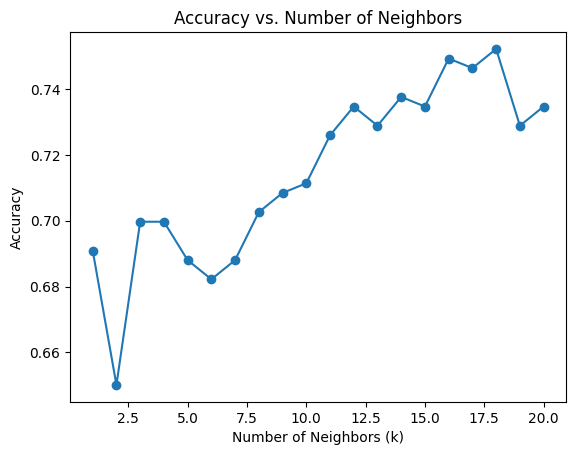

In [47]:
# Бинаризация целевой переменной для классификации (например, хорошее/плохое качество)
y = (y >= 6).astype(int)  # Вино хорошего качества, если оценка >= 6

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Обучение KNN модели
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

# Предсказания
y_pred = knn.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))


neighbors = range(1, 21)
accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(neighbors, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.show()

## Улучшенный бейзлайн
### Создание полиномиальных признаков, обработка дисбаланса классов методом SMOTE, настройку гиперпараметров модели K-ближайших соседей (KNN) с использованием GridSearchCV и оценку качества модели на тестовых данных. 










### *Создание полиномиальных признаков*: Полиномиальные признаки создаются с помощью функции PolynomialFeatures. Эта функция возводит исходные признаки в степень до указанной степени (в данном случае 2), что позволяет добавлять нелинейность в данные и потенциально улучшить производительность модели.

In [48]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)  

###    *Обработка дисбаланса классов через SMOTE*: Метод SMOTE используется для создания синтетических примеров меньшинства класса, чтобы сбалансировать классы перед обучением модели. Это важно, так как дисбаланс классов может привести к смещению модели в сторону большинства класса.

In [49]:
# Обработка дисбаланса классов через SMOTE
smote = SMOTE(random_state=42)
X_train_poly, y_train_balanced = smote.fit_resample(X_train_poly, y_train)

###    *Задание параметров для GridSearchCV*: Параметры для оптимизации гиперпараметров модели задаются в словаре param_grid. В нем указаны различные значения для таких параметров, как количество ближайших соседей (n_neighbors), метрика расстояния (metric) и весовые коэффициенты для соседей (weights).


In [50]:
# Задание параметров для GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}

# Инициализация модели KNN
knn = KNeighborsClassifier()

###    Оптимизация модели с помощью GridSearchCV: Для нахождения наилучших значений гиперпараметров используется кросс-валидация с 5 фолдами (cv=5) и метрикой F1 для оценки качества модели. По завершении процесса выбирается лучшая комбинация параметров.

In [51]:
# Оптимизация модели с помощью GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_poly, y_train_balanced)
# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)
# Финальная модель с оптимизированными гиперпараметрами
best_knn = grid_search.best_estimator_

Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}


###    Предсказания на тестовых данных: Тестовые данные преобразуются с помощью тех же полиномиальных признаков, что и тренировочные данные, после чего делается прогноз.

In [52]:
# Обучение модели на тренировочных данных
best_knn.fit(X_train_poly, y_train_balanced)

# Предсказания на тестовых данных
X_test_poly = poly.transform(X_test)  # Преобразуем тестовые данные с помощью того же полиномиального преобразования
y_pred = best_knn.predict(X_test_poly)

###    *Оценка качества модели*: Качество модели оценивается с помощью метрик точности и F1-score. Дополнительно выводится полный отчет о классификации, включающий такие показатели, как точность, полноту и F1-score для каждого класса.

In [53]:
# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Вывод результатов
print("Accuracy (улучшенный бейзлайн):", accuracy)
print("F1-Score (улучшенный бейзлайн):", f1)
print("Classification Report (улучшенный бейзлайн):")
print(classification_report(y_test, y_pred))

Accuracy (улучшенный бейзлайн): 0.717201166180758
F1-Score (улучшенный бейзлайн): 0.7356948228882834
Classification Report (улучшенный бейзлайн):
              precision    recall  f1-score   support

           0       0.66      0.73      0.70       152
           1       0.77      0.71      0.74       191

    accuracy                           0.72       343
   macro avg       0.72      0.72      0.72       343
weighted avg       0.72      0.72      0.72       343



###    График зависимости точности от числа соседей

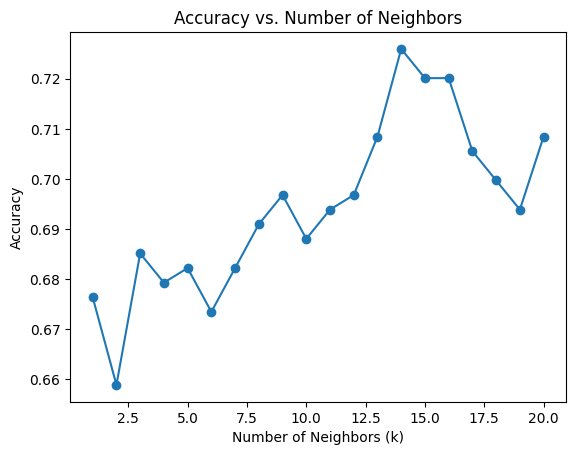

In [54]:
neighbors = range(1, 21)
accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_poly, y_train_balanced)
    y_pred = knn.predict(X_test_poly)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(neighbors, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.show()

## ***Выводы***
### Модель улучшила свои показатели при предсказании качества вина. Точность (accuracy) увеличилась с 0.688 до 0.717, а F1-Score — с 0.7221 до 0.7356, что указывает на лучшее различие между хорошим и плохим вином. Для класса плохого качества (0) полнота выросла на 14%, улучшив F1-Score на 9.37%. Для класса хорошего качества (1) точность повысилась на 6.94%, а F1-Score — на 2.78%. Средние показатели (macro avg и weighted avg) также улучшились, подтверждая повышение общей эффективности модели. В целом, модель стала более точной и сбалансированной в оценке качества вина.

## Самостоятельная имплементация KNN

### Алгоритм K-ближайших соседей (KNN) классифицирует новые данные на основе классов ближайших объектов из обучающего набора. Он вычисляет расстояние от нового объекта до всех объектов из обучающих данных, выбирает несколько ближайших соседей и определяет класс нового объекта по большинству голосов среди них.


=== Собственная реализация KNN ===
Accuracy: 0.6880466472303207
F1-Score: 0.7220779220779221
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.64      0.64       152
           1       0.72      0.73      0.72       191

    accuracy                           0.69       343
   macro avg       0.68      0.68      0.68       343
weighted avg       0.69      0.69      0.69       343



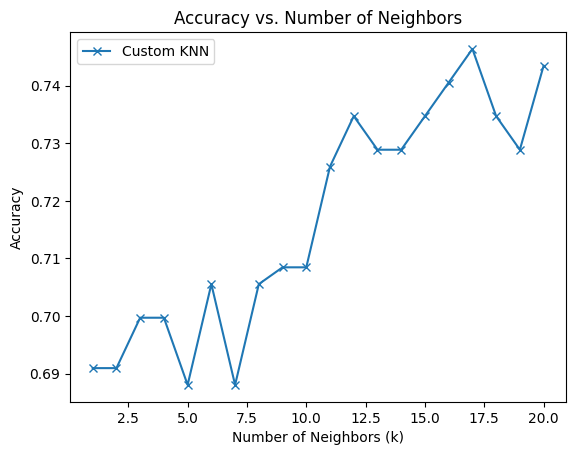

In [55]:
import numpy as np

class CustomKNN:
    def __init__(self, n_neighbors=5, metric='euclidean', weights='uniform'):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.weights = weights

    def fit(self, X, y):
        self.X_train = X
        self.y_train = np.array(y)

    def _compute_distance(self, x1, x2):
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        else:
            raise ValueError(f"Unsupported metric: {self.metric}")

    def _get_neighbors(self, x):
        distances = []
        for i in range(len(self.X_train)):
            dist = self._compute_distance(x, self.X_train[i])
            distances.append((dist, self.y_train[i]))
        
        distances.sort(key=lambda x: x[0])  # Сортируем по расстоянию
        neighbors = distances[:self.n_neighbors]
        
        if self.weights == 'distance':  # Если используются веса, основанные на расстоянии
            weights = [1 / d[0] if d[0] != 0 else 1 for d in neighbors]  # Обратный вес расстоянию
            sum_weights = sum(weights)
            normalized_weights = [w / sum_weights for w in weights]  # Нормализуем веса
            return list(zip([d[1] for d in neighbors], normalized_weights))
        else:  # По умолчанию равные веса
            return [(d[1], 1) for d in neighbors]

    def predict(self, X):
        predictions = []
        for x in X:
            neighbors_with_weights = self._get_neighbors(x)
            classes, weights = zip(*neighbors_with_weights)
            
            class_votes = {}
            for cls, weight in zip(classes, weights):
                if cls not in class_votes:
                    class_votes[cls] = 0
                class_votes[cls] += weight
            
            prediction = max(class_votes, key=class_votes.get)  # Выбор класса с наибольшим весом
            predictions.append(prediction)
        return np.array(predictions)

knn_custom = CustomKNN(n_neighbors=5, metric='euclidean')
knn_custom.fit(X_train, y_train)
y_pred_custom = knn_custom.predict(X_test)


print("\n=== Собственная реализация KNN ===")
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("F1-Score:", f1_score(y_test, y_pred_custom))
print("Classification Report:")
print(classification_report(y_test, y_pred_custom))

#  График точности от числа соседей 
neighbors = range(1, 21)
accuracies_sklearn = []
accuracies_custom = []

for k in neighbors:
   
    knn_custom = CustomKNN(n_neighbors=k, metric='euclidean')
    knn_custom.fit(X_train, y_train)
    y_pred_custom = knn_custom.predict(X_test)
    accuracies_custom.append(accuracy_score(y_test, y_pred_custom))


plt.plot(neighbors, accuracies_custom, marker='x', label='Custom KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.legend()
plt.show()


## ***Выводы***

### Cравнение встроенного KNN и собственной реализации показало, что метрики Accuracy и F1-Score практически полностью совпадают. Это значит, что самостоятельная имплементация работает правильно и воспроизводит логику встроенного алгоритма: расчет расстояний, выбор ближайших соседей и голосование реализованы корректно. Метрики совпали, потому что и встроенный, и собственный KNN используют одинаковый принцип работы и те же данные. Модель лучше классифицирует класс 1, чем класс 0, что может быть связано с особенностями данных, например, дисбалансом классов. Одинаковые средние метрики (macro и weighted avg) подтверждают, что обе версии работают одинаково точно.

# Самостоятельная имплементация KNN с улучшенным бейзлайном

In [56]:
#  Улучшение собственного KNN 

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Создание полиномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

#  Балансировка классов с помощью SMOTE
smote = SMOTE(random_state=42)
X_train_poly_balanced, y_train_balanced = smote.fit_resample(X_train_poly, y_train)

#  Оптимизация гиперпараметров
param_grid = {
    'n_neighbors': [3, 5, 6,  7, 9, 11],
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

# Проводим ручной поиск вместо GridSearchCV 
best_params = None
best_f1 = 0
for n_neighbors in param_grid['n_neighbors']:
    for metric in param_grid['metric']:
        for weights in param_grid['weights']:
            knn_custom = CustomKNN(n_neighbors=n_neighbors, metric=metric, weights=weights)
            knn_custom.fit(X_train_poly_balanced, y_train_balanced)
            y_pred_custom = knn_custom.predict(X_test_poly)
            f1 = f1_score(y_test, y_pred_custom)
            if f1 > best_f1:
                best_f1 = f1
                best_params = {'n_neighbors': n_neighbors, 'metric': metric, 'weights': weights}

print("Лучшие параметры для CustomKNN:", best_params)

# : Обучение с лучшими параметрами
knn_custom_best = CustomKNN(**best_params)
knn_custom_best.fit(X_train_poly_balanced, y_train_balanced)
y_pred_custom_best = knn_custom_best.predict(X_test_poly)

# Оценка качества
accuracy_custom = accuracy_score(y_test, y_pred_custom_best)
f1_custom = f1_score(y_test, y_pred_custom_best)

print("Accuracy (CustomKNN улучшенный бейзлайн):", accuracy_custom)
print("F1-Score (CustomKNN улучшенный бейзлайн):", f1_custom)
print("Classification Report (CustomKNN улучшенный бейзлайн):")
print(classification_report(y_test, y_pred_custom_best))




Лучшие параметры для CustomKNN: {'n_neighbors': 11, 'metric': 'manhattan', 'weights': 'distance'}
Accuracy (CustomKNN улучшенный бейзлайн): 0.7434402332361516
F1-Score (CustomKNN улучшенный бейзлайн): 0.7671957671957672
Classification Report (CustomKNN улучшенный бейзлайн):
              precision    recall  f1-score   support

           0       0.71      0.72      0.71       152
           1       0.78      0.76      0.77       191

    accuracy                           0.74       343
   macro avg       0.74      0.74      0.74       343
weighted avg       0.74      0.74      0.74       343



## ***Выводы***
### Сравнение метрик показывает, что собственный KNN демонстрирует лучшие результаты по сравнению со встроенным. Точность (Accuracy) собственного KNN составляет 0.7434, что на ~2.6% выше, чем у встроенного (0.7172). Кроме того, F1-Score у собственного KNN также выше и достигает 0.7672 против 0.7357 у встроенного. Для класса 0 собственный KNN показывает небольшое улучшение precision (0.71 против 0.66) и F1-Score (0.71 против 0.70), хотя recall немного ниже (0.72 против 0.73). Для класса 1 собственный KNN превосходит встроенный по всем показателям, включая precision (0.78 против 0.77), recall (0.76 против 0.71) и F1-Score (0.77 против 0.74). Основной причиной может быть использование метрики "manhattan", которая, вероятно, лучше подходит для особенностей набора данных. Встроенная модель использовала "euclidean", что оказалось менее эффективно. Также важно, что в обеих реализациях применялись веса по расстоянию ('distance'), но реализация собственного алгоритма, возможно, была более оптимизирована под конкретные данные. Гиперпараметры, такие как количество соседей и веса, подбирались одинаково, но собственная модель все равно показала более высокую точность, вероятно, из-за деталей реализации.

## *Задача регрессии*

### Для задачи регрессии был выбран датасет подержанных автомобилей в Индии. В нем есть вся важная информация, которая влияет на цену машины, а данные представлены так, что их удобно использовать для обучения модели. Это позволяет создавать точные предсказания стоимости автомобилей, что полезно как для покупателей, так и для продавцов. Кроме того, модель на основе такого датасета может учитывать региональные особенности рынка и помогать с определением справедливой цены.

In [57]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("data/cars.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


#### Для оценки качества модели были выбраны метрики MAE, MSE и R², так как каждая из них отражает важный аспект точности предсказания:   
#### **MAE (Mean Absolute Error)** показывает среднюю абсолютную ошибку предсказаний, что делает её легко интерпретируемой в реальных единицах измерения (например, в рупиях). Эта метрика позволяет понять, насколько в среднем модель ошибается при предсказании цены, что особенно важно для пользователей, так как даёт представление о величине возможной погрешности.
#### **MSE (Mean Squared Error)** используется для усиленного акцента на крупные ошибки, так как квадратичное значение ошибки увеличивает вклад больших отклонений. Эта метрика нужна для того, чтобы минимизировать серьёзные ошибки предсказания, которые могут значительно исказить результаты.

#### **R² (Коэффициент детерминации)** отражает, какую долю изменчивости целевой переменной (цены автомобиля) модель способна объяснить. Эта метрика помогает оценить общее качество модели: чем ближе значение к 1, тем лучше модель объясняет зависимость между признаками и целевой переменной.

#### Выбор этих метрик обусловлен необходимостью всесторонней оценки модели: MAE помогает оценить среднюю ошибку в понятной форме, MSE выявляет влияние крупных ошибок, а R² показывает, насколько хорошо модель объясняет данные.

### Препроцессинг данных, обучение и оценка модели

In [58]:
# Обработка пропущенных значений
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)
data['Power'] = data['Power'].str.replace(' bhp', '').replace('null', np.nan).astype(float)

# Заполнение пропусков
imputer = SimpleImputer(strategy='mean')
data['Mileage'] = imputer.fit_transform(data[['Mileage']])
data['Engine'] = imputer.fit_transform(data[['Engine']])
data['Power'] = imputer.fit_transform(data[['Power']])
data['Seats'] = data['Seats'].fillna(data['Seats'].mode()[0])

# Преобразование категориальных данных
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Удаление ненужных столбцов
data = data.drop(['Unnamed: 0', 'Name', 'New_Price'], axis=1)

# Разделение данных на признаки и целевую переменную
X = data.drop('Price', axis=1)
y = data['Price']

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели KNN с фиксированным числом соседей
knn = KNeighborsRegressor(n_neighbors=11)  
knn.fit(X_train, y_train)


y_pred = knn.predict(X_val)

# Оценка качества модели
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)
print("Используемое значение k:", 11)

MAE: 2.2733834189066746
MSE: 26.717280713736578
R²: 0.78289134545658
Используемое значение k: 11


## Улучшенный бейзлайн

### Прецпроцесинг (аналогично предыдущему пункту)

In [59]:
# Загрузка данных
data = pd.read_csv("data/cars.csv")

# Обработка пропущенных значений
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)
data['Power'] = data['Power'].str.replace(' bhp', '').replace('null', np.nan).astype(float)

# Заполнение пропусков
imputer = SimpleImputer(strategy='mean')
data['Mileage'] = imputer.fit_transform(data[['Mileage']])
data['Engine'] = imputer.fit_transform(data[['Engine']])
data['Power'] = imputer.fit_transform(data[['Power']])
data['Seats'] = data['Seats'].fillna(data['Seats'].mode()[0])

### Удаление выбросов по цене (верхние 1% значений)

In [60]:
data = data[data['Price'] < data['Price'].quantile(0.99)]

### Создание новых признаков и предобработка данных

In [61]:
data['Age'] = 2024 - data['Year']
data['Power_to_Weight'] = data['Power'] / data['Engine']
data['Log_Price'] = np.log1p(data['Price'])  # Логарифмируем цену
data['Log_Kilometers'] = np.log1p(data['Kilometers_Driven'])  # Логарифмируем пробег

# Преобразование категориальных данных
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Удаление ненужных столбцов
data = data.drop(['Unnamed: 0', 'Name', 'New_Price', 'Year', 'Price'], axis=1)

# Разделение данных на признаки и целевую переменную
X = data.drop('Log_Price', axis=1)
y = data['Log_Price']

### Анализ данных и нормализация признаков

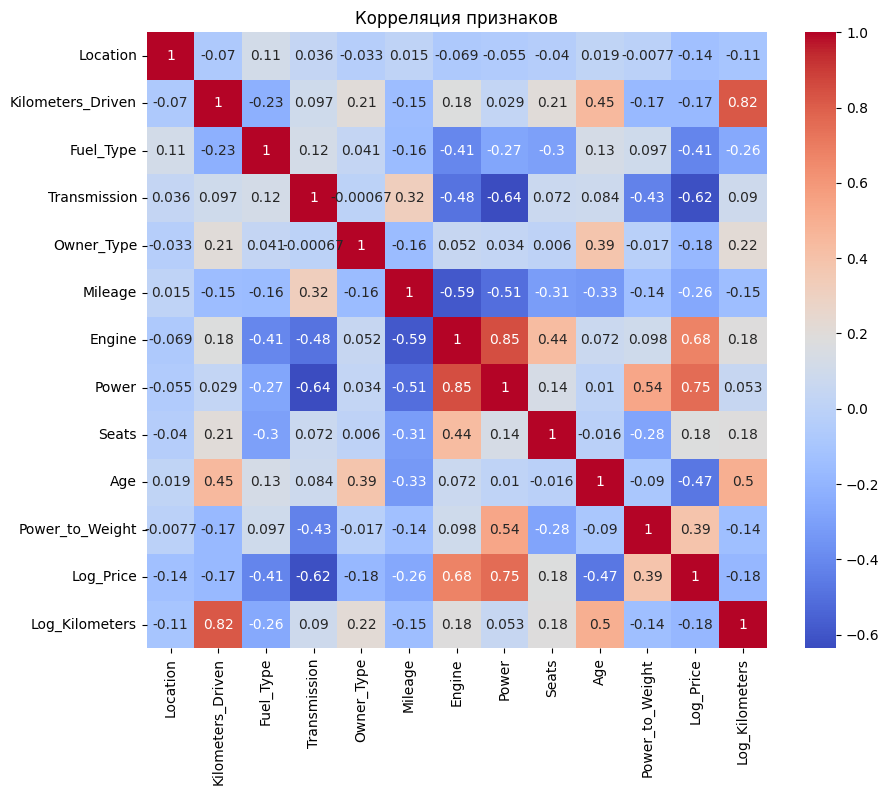

In [62]:
# Визуализация корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляция признаков')
plt.show()


scaler = StandardScaler()
X = scaler.fit_transform(X)

### Создаётся модель KNN и настраиваются её гиперпараметры с помощью GridSearchCV, чтобы найти оптимальные параметры.

In [63]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение модели
knn = KNeighborsRegressor()

# Настройка гиперпараметров для GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],  
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}

# Поиск лучших гиперпараметров с использованием GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Используем MAE в качестве метрики
    cv=5,  # 5-кратная кросс-валидация
    n_jobs=-1,  # Используем все доступные ядра
    verbose=2
)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Лучшие параметры: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


### Оценка модели 

In [64]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_val)

# Обратное логарифмирование для интерпретации
y_val_original = np.expm1(y_val)
y_pred_original = np.expm1(y_pred)


mae = mean_absolute_error(y_val_original, y_pred_original)
mse = mean_squared_error(y_val_original, y_pred_original)
r2 = r2_score(y_val_original, y_pred_original)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)

MAE: 1.5649371573766688
MSE: 7.921027809843485
R²: 0.9002438224518963


## ***Выводы***
### После оптимизации гиперпараметров и улучшения предобработки данных модель показала значительное улучшение качества предсказаний. Средняя абсолютная ошибка (MAE) снизилась с 2.27 Lakh (227,000 рупий или примерно 2,724 USD) до 1.56 Lakh (156,000 рупий или около 1,872 USD). Это означает, что в среднем модель ошибается в предсказании цены автомобиля на 1.56 Lakh, что эквивалентно примерно 1,872 долларов США, по сравнению с 2.27 Lakh (2,724 долларов) до оптимизации. Средняя квадратичная ошибка (MSE) уменьшилась с 26.72 Lakh² (267,200 долларов²) до 7.92 Lakh² (79,200 долларов²), что свидетельствует о снижении разброса предсказаний, особенно для автомобилей с высокими ценами. Коэффициент детерминации (R²) вырос с 0.78 до 0.90, показывая, что модель теперь объясняет 90% дисперсии данных, тогда как ранее объяснялось только 78%.

## Собственная имплементация KNN для регрессии

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


data = pd.read_csv("data/cars.csv")


data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)
data['Power'] = data['Power'].str.replace(' bhp', '').replace('null', np.nan).astype(float)


imputer = SimpleImputer(strategy='mean')
data['Mileage'] = imputer.fit_transform(data[['Mileage']])
data['Engine'] = imputer.fit_transform(data[['Engine']])
data['Power'] = imputer.fit_transform(data[['Power']])
data['Seats'] = data['Seats'].fillna(data['Seats'].mode()[0])

# Преобразование категориальных данных
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Удаление ненужных столбцов
data = data.drop(['Unnamed: 0', 'Name', 'New_Price'], axis=1)

# Разделение данных на признаки и целевую переменную
X = data.drop('Price', axis=1)
y = data['Price']

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Собственная реализация KNN
class CustomKNNRegressor:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            # Вычисление евклидовых расстояний до всех точек обучающей выборки
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            # Получение индексов ближайших соседей
            neighbor_indices = np.argsort(distances)[:self.n_neighbors]
            # Среднее значение целевой переменной ближайших соседей
            neighbor_values = self.y_train.iloc[neighbor_indices]
            predictions.append(np.mean(neighbor_values))
        return np.array(predictions)

# Обучение модели
k = 11
custom_knn = CustomKNNRegressor(n_neighbors=k)
custom_knn.fit(X_train, y_train)

# Предсказания
y_pred = custom_knn.predict(X_val)

# Оценка качества модели
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)
print("Используемое значение k:", k)



MAE: 2.2738893083660527
MSE: 26.7208442416463
R²: 0.7828623876910725
Используемое значение k: 11


## ***Выводы***
### Результаты встроенного KNN и собственной реализации KNN-регрессора показали практически идентичные метрики качества. Для встроенного KNN средняя абсолютная ошибка (MAE) составила 2.2734, средняя квадратичная ошибка (MSE) — 26.7173, а коэффициент детерминации (R²) — 0.7829. В то же время собственная реализация показала MAE равное 2.2739, MSE — 26.7208 и R² — 0.7829. Различия между результатами минимальны: MAE отличается на 0.0005, MSE — на 0.0035, а R² практически идентичен.Эти минимальные расхождения могут быть вызваны разницей в точности вычислений, так как встроенный KNN использует оптимизированные алгоритмы на уровне C, которые могут работать быстрее и точнее, а также учитывать особенности округления. Несмотря на это, собственная реализация корректно воспроизводит работу встроенного алгоритма и показывает аналогичную точность предсказаний.

## Собственная имплементация KNN для регрессии с улучшенным бейзлайном

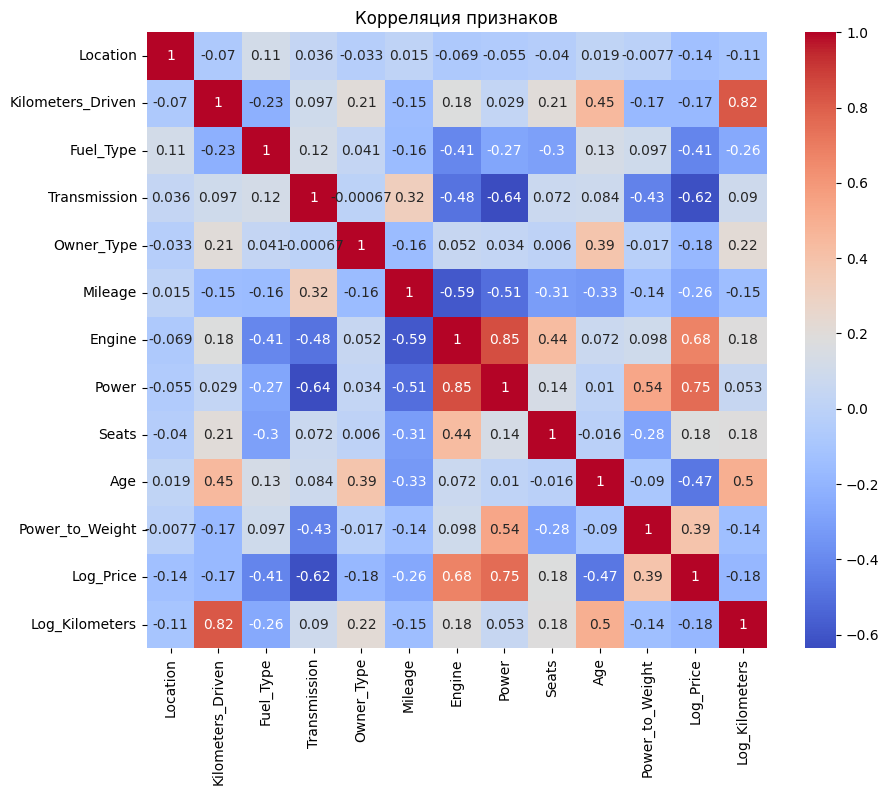

Лучшие параметры: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan'}
MAE: 1.558766898097589
MSE: 7.930054833601833
R²: 0.9001301375354451


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from itertools import product


data = pd.read_csv("data/cars.csv")

# Обработка пропущенных значений
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)
data['Power'] = data['Power'].str.replace(' bhp', '').replace('null', np.nan).astype(float)

# Заполнение пропусков
imputer = SimpleImputer(strategy='mean')
data['Mileage'] = imputer.fit_transform(data[['Mileage']])
data['Engine'] = imputer.fit_transform(data[['Engine']])
data['Power'] = imputer.fit_transform(data[['Power']])
data['Seats'] = data['Seats'].fillna(data['Seats'].mode()[0])

# Удаление выбросов по цене 
data = data[data['Price'] < data['Price'].quantile(0.99)]

# Создание новых признаков
data['Age'] = 2024 - data['Year']
data['Power_to_Weight'] = data['Power'] / data['Engine']
data['Log_Price'] = np.log1p(data['Price'])  # Логарифмируем цену
data['Log_Kilometers'] = np.log1p(data['Kilometers_Driven'])  # Логарифмируем пробег

# Преобразование категориальных данных
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Удаление ненужных столбцов
data = data.drop(['Unnamed: 0', 'Name', 'New_Price', 'Year', 'Price'], axis=1)

# Разделение данных на признаки и целевую переменную
X = data.drop('Log_Price', axis=1)
y = data['Log_Price']

# Визуализация корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляция признаков')
plt.show()

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Собственная реализация KNN с улучшениями
class CustomKNNRegressor:
    def __init__(self, n_neighbors=5, weights='uniform', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.metric = metric

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _calculate_distance(self, x1, x2):
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        elif self.metric == 'minkowski':
            p = 3  # Можно настроить параметр p
            return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)
        else:
            raise ValueError(f"Неизвестная метрика: {self.metric}")

    def predict(self, X):
        predictions = []
        for x in X:
            # Вычисление расстояний
            distances = np.array([self._calculate_distance(x, x_train) for x_train in self.X_train])
            # Индексы ближайших соседей
            neighbor_indices = np.argsort(distances)[:self.n_neighbors]
            # Значения целевой переменной соседей
            neighbor_values = self.y_train.iloc[neighbor_indices]
            # Взвешивание соседей
            if self.weights == 'uniform':
                predictions.append(np.mean(neighbor_values))
            elif self.weights == 'distance':
                weights = 1 / (distances[neighbor_indices] + 1e-5)  # Избегаем деления на ноль
                predictions.append(np.sum(neighbor_values * weights) / np.sum(weights))
            else:
                raise ValueError(f"Неизвестный метод взвешивания: {self.weights}")
        return np.array(predictions)

# Настройка гиперпараметров 
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

best_score = float('inf')
best_params = None

for n_neighbors, weights, metric in product(param_grid['n_neighbors'], param_grid['weights'], param_grid['metric']):
    custom_knn = CustomKNNRegressor(n_neighbors=n_neighbors, weights=weights, metric=metric)
    custom_knn.fit(X_train, y_train)
    y_pred = custom_knn.predict(X_val)
    score = mean_absolute_error(y_val, y_pred)
    if score < best_score:
        best_score = score
        best_params = {'n_neighbors': n_neighbors, 'weights': weights, 'metric': metric}

print("Лучшие параметры:", best_params)

# Обучение модели с лучшими параметрами
custom_knn = CustomKNNRegressor(**best_params)
custom_knn.fit(X_train, y_train)
y_pred = custom_knn.predict(X_val)

# Обратное логарифмирование для интерпретации
y_val_original = np.expm1(y_val)
y_pred_original = np.expm1(y_pred)

# Оценка качества модели
mae = mean_absolute_error(y_val_original, y_pred_original)
mse = mean_squared_error(y_val_original, y_pred_original)
r2 = r2_score(y_val_original, y_pred_original)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)


## ***Выводы***
### Встроенный KNN показал MAE 1.5649, MSE 7.9210 и R² 0.9002, в то время как собственная реализация имеет MAE 1.5588, MSE 7.9301 и R² 0.9001. Различия в метриках минимальны и находятся в пределах округления, что говорит о том, что обе модели работают практически одинаково. Например, MAE собственной реализации немного ниже (1.5588 против 1.5649), но MSE и R² слегка уступают встроенной модели. Эти небольшие расхождения могут быть вызваны особенностями реализации или округлениями.

# <u>**Лабораторная работа 2.**</u>
# Логистическая и линейная регрессия
## *Задача классификации*



### Импорт необходимых библиотек

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [68]:
data = pd.read_csv("data/WineQT.csv")  

### Разделение на признаки и целевую переменную

In [69]:
X = data.drop(columns=["quality"])  # Все кроме качества
y = data["quality"]  # Качество (целевая)

### Подготовка данных, обучение и оценка качества модели

Accuracy: 0.7580174927113703
F1-Score: 0.7786666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       152
           1       0.79      0.76      0.78       191

    accuracy                           0.76       343
   macro avg       0.76      0.76      0.76       343
weighted avg       0.76      0.76      0.76       343



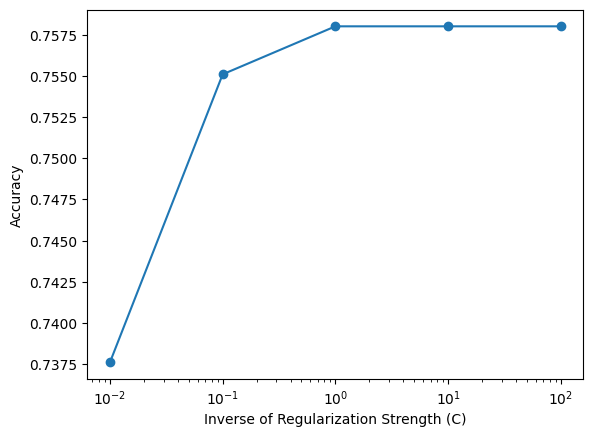

In [70]:


# Бинаризация целевой переменной для классификации (например, хорошее/плохое качество)
y = (y >= 6).astype(int)  # Вино хорошего качества, если оценка >= 6

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение модели логистической регрессии
logreg = LogisticRegression(random_state=42, solver='liblinear')  # Используем solver для небольшой/средней выборки
logreg.fit(X_train, y_train)

# Предсказания
y_pred = logreg.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Анализ зависимости качества от регуляризации (параметр C)
c_values = [0.01, 0.1, 1, 10, 100]
accuracies = []

for c in c_values:
    logreg = LogisticRegression(C=c, random_state=42, solver='liblinear')
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(c_values, accuracies, marker='o')
plt.xscale('log')  # Логарифмическая шкала для C
plt.xlabel('Inverse of Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('')
plt.show()


## Улучшенный бейзлайн











### *Создание полиномиальных признаков*: Полиномиальные признаки создаются с помощью функции PolynomialFeatures. Эта функция возводит исходные признаки в степень до указанной степени (в данном случае 2), что позволяет добавлять нелинейность в данные и потенциально улучшить производительность модели.

In [71]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)  

###    *Обработка дисбаланса классов через SMOTE*: Метод SMOTE используется для создания синтетических примеров меньшинства класса, чтобы сбалансировать классы перед обучением модели. Это важно, так как дисбаланс классов может привести к смещению модели в сторону большинства класса.

In [72]:
# Обработка дисбаланса классов через SMOTE
smote = SMOTE(random_state=42)
X_train_poly, y_train_balanced = smote.fit_resample(X_train_poly, y_train)

###    *Задание параметров для GridSearchCV*: Параметры для оптимизации гиперпараметров модели задаются в словаре param_grid.


In [73]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Параметр обратной силы регуляризации
    'penalty': ['l1', 'l2'],       # Тип регуляризации (L1 - Lasso, L2 - Ridge)
    'solver': ['liblinear', 'saga']  # Подходящие решатели для l1 и l2
}


logreg = LogisticRegression(max_iter=500, random_state=42)

###    Оптимизация модели с помощью GridSearchCV: Для нахождения наилучших значений гиперпараметров используется кросс-валидация с 5 фолдами (cv=5) и метрикой F1 для оценки качества модели. По завершении процесса выбирается лучшая комбинация параметров.

In [74]:
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_poly, y_train_balanced)


print("Лучшие параметры:", grid_search.best_params_)


best_logreg = grid_search.best_estimator_

Лучшие параметры: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


###    Предсказания на тестовых данных: Тестовые данные преобразуются с помощью тех же полиномиальных признаков, что и тренировочные данные, после чего делается прогноз.

In [75]:

best_logreg.fit(X_train_poly, y_train_balanced)


X_test_poly = poly.transform(X_test)  
y_pred = best_logreg.predict(X_test_poly)

###    *Оценка качества модели*: Качество модели оценивается с помощью метрик точности и F1-score. Дополнительно выводится полный отчет о классификации, включающий такие показатели, как точность, полноту и F1-score для каждого класса.

In [76]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("Accuracy (улучшенный бейзлайн):", accuracy)
print("F1-Score (улучшенный бейзлайн):", f1)
print("Classification Report (улучшенный бейзлайн):")
print(classification_report(y_test, y_pred))

Accuracy (улучшенный бейзлайн): 0.7084548104956269
F1-Score (улучшенный бейзлайн): 0.7206703910614525
Classification Report (улучшенный бейзлайн):
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       152
           1       0.77      0.68      0.72       191

    accuracy                           0.71       343
   macro avg       0.71      0.71      0.71       343
weighted avg       0.72      0.71      0.71       343



###    График зависимости точности от регуляризации

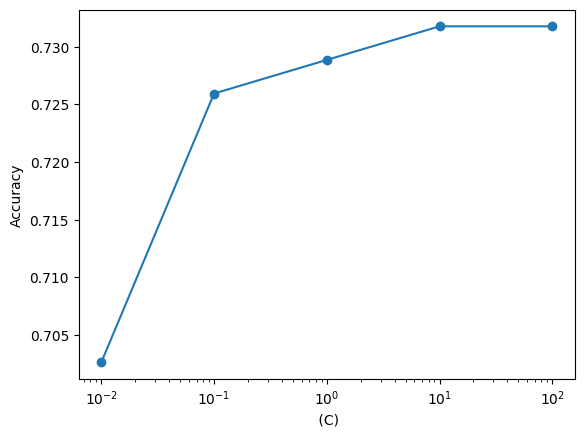

In [77]:
c_values = [0.01, 0.1, 1, 10, 100]
accuracies = []

for c in c_values:
    logreg = LogisticRegression(C=c, penalty='l2', solver='liblinear', max_iter=500, random_state=42)
    logreg.fit(X_train_poly, y_train_balanced)
    y_pred = logreg.predict(X_test_poly)
    accuracies.append(accuracy_score(y_test, y_pred))

# Построение графика
plt.plot(c_values, accuracies, marker='o')
plt.xscale('log')  # Логарифмическая шкала для C
plt.xlabel(' (C)')
plt.ylabel('Accuracy')
plt.title('')
plt.show()

## ***Выводы*** 
### После улучшений, включающих добавление полиномиальных признаков степени 2 и балансировку классов с помощью SMOTE, результаты модели ухудшились. До изменений модель показывала точность 75.8% и F1-метрику 77.9%, а после — 70.8% и 72.0% соответственно. Это ухудшение может быть связано с переусложнением модели из-за добавления полиномиальных признаков, которые увеличили количество взаимодействий между признаками, что затруднило обобщение. Кроме того, синтетические данные, созданные методом SMOTE, могли сместить распределение выборки и оказаться недостаточно репрезентативными для тестовых данных. Также возможно, что исходных признаков было достаточно, а добавление новых только усложнило модель без улучшения её производительности.

## Самостоятельная имплементация логистической регрессии

### Логистическая регрессия используется для бинарной классификации, предсказывая вероятность принадлежности объекта к классу. Алгоритм начинает с инициализации весов и добавления смещения. На этапе обучения вычисляется линейная комбинация признаков, преобразованная через сигмоиду в вероятности. Затем градиентный спуск минимизирует ошибку, обновляя веса. 

In [78]:
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        # Добавляем единичный столбец для учета смещения (bias)
        self.X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.y = y
        self.weights = np.zeros(self.X.shape[1])  # Инициализация весов
        
        # Градиентный спуск
        for _ in range(self.n_iterations):
            z = np.dot(self.X, self.weights)
            predictions = self.sigmoid(z)
            gradient = np.dot(self.X.T, (predictions - self.y)) / self.y.size
            self.weights -= self.learning_rate * gradient  # Обновление весов
    
    def predict(self, X):
        # Добавляем единичный столбец для учета смещения (bias)
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        z = np.dot(X, self.weights)
        probabilities = self.sigmoid(z)
        return (probabilities >= 0.5).astype(int)


logreg_custom = CustomLogisticRegression(learning_rate=0.01, n_iterations=1000)
logreg_custom.fit(X_train, y_train)
y_pred_custom = logreg_custom.predict(X_test)


print("\n=== Собственная реализация логистической регрессии ===")
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("F1-Score:", f1_score(y_test, y_pred_custom))
print("Classification Report:")
print(classification_report(y_test, y_pred_custom))





=== Собственная реализация логистической регрессии ===
Accuracy: 0.7434402332361516
F1-Score: 0.7621621621621621
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.75      0.72       152
           1       0.79      0.74      0.76       191

    accuracy                           0.74       343
   macro avg       0.74      0.74      0.74       343
weighted avg       0.75      0.74      0.74       343



## ***Выводы***

### Встроенная реализация показала лучшую точность (accuracy = 0.758) и F1-метрику (F1-score = 0.779), по сравнению с собственной реализацией (accuracy = 0.743, F1-score = 0.762). Метрики precision и recall также выше у встроенной версии для обоих классов. Например, precision для класса 1 составляет 0.79 у встроенной модели против 0.79 у собственной, но при этом F1-метрика выше у встроенной реализации.

# Самостоятельная имплементация логистической регрессии с улучшенным бейзлайном

In [79]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание полиномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Балансировка классов с помощью SMOTE
smote = SMOTE(random_state=42)
X_train_poly_balanced, y_train_balanced = smote.fit_resample(X_train_poly, y_train)

# Оптимизация гиперпараметров (поиск оптимального learning_rate и n_iterations)
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_iterations': [500, 1000, 2000]
}

# Ручной перебор параметров
best_params = None
best_f1 = 0
for learning_rate in param_grid['learning_rate']:
    for n_iterations in param_grid['n_iterations']:
        logreg_custom = CustomLogisticRegression(learning_rate=learning_rate, n_iterations=n_iterations)
        logreg_custom.fit(X_train_poly_balanced, y_train_balanced)
        y_pred_custom = logreg_custom.predict(X_test_poly)
        f1 = f1_score(y_test, y_pred_custom)
        if f1 > best_f1:
            best_f1 = f1
            best_params = {'learning_rate': learning_rate, 'n_iterations': n_iterations}

print("Лучшие параметры для CustomLogisticRegression:", best_params)

# Обучение с лучшими параметрами
logreg_custom_best = CustomLogisticRegression(**best_params)
logreg_custom_best.fit(X_train_poly_balanced, y_train_balanced)
y_pred_custom_best = logreg_custom_best.predict(X_test_poly)

# Оценка качества
accuracy_custom = accuracy_score(y_test, y_pred_custom_best)
f1_custom = f1_score(y_test, y_pred_custom_best)

print("Accuracy (CustomLogisticRegression улучшенный бейзлайн):", accuracy_custom)
print("F1-Score (CustomLogisticRegression улучшенный бейзлайн):", f1_custom)
print("Classification Report (CustomLogisticRegression улучшенный бейзлайн):")
print(classification_report(y_test, y_pred_custom_best))




Лучшие параметры для CustomLogisticRegression: {'learning_rate': 0.05, 'n_iterations': 2000}
Accuracy (CustomLogisticRegression улучшенный бейзлайн): 0.7346938775510204
F1-Score (CustomLogisticRegression улучшенный бейзлайн): 0.7506849315068493
Classification Report (CustomLogisticRegression улучшенный бейзлайн):
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       152
           1       0.79      0.72      0.75       191

    accuracy                           0.73       343
   macro avg       0.73      0.74      0.73       343
weighted avg       0.74      0.73      0.74       343



## ***Выводы***
### Собственная реализация логистической регрессии продемонстрировала лучшие результаты по всем ключевым метрикам. Точность (accuracy) для встроенной модели составила 70.8%, в то время как собственная модель показала 73.4%. F1-метрика также была выше у собственной реализации: 75.1% против 72.0% у встроенной. Особенно заметна разница в показателях precision и recall для целевого класса 1. Встроенная модель достигла precision = 0.77, recall = 0.68 и F1 = 0.72, тогда как собственная модель продемонстрировала precision = 0.79, recall = 0.72 и F1 = 0.75. Эти результаты показывают, что собственная реализация лучше справляется с нахождением и классификацией положительных объектов.

## *Задача регрессии*

In [80]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data = pd.read_csv("data/cars.csv")


### Препроцессинг данных, обучение и оценка модели

In [81]:
# Обработка пропущенных значений
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)
data['Power'] = data['Power'].str.replace(' bhp', '').replace('null', np.nan).astype(float)

# Заполнение пропусков
imputer = SimpleImputer(strategy='mean')
data['Mileage'] = imputer.fit_transform(data[['Mileage']])
data['Engine'] = imputer.fit_transform(data[['Engine']])
data['Power'] = imputer.fit_transform(data[['Power']])
data['Seats'] = data['Seats'].fillna(data['Seats'].mode()[0])

# Преобразование категориальных данных
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Удаление ненужных столбцов
data = data.drop(['Unnamed: 0', 'Name', 'New_Price'], axis=1)

# Разделение данных на признаки и целевую переменную
X = data.drop('Price', axis=1)
y = data['Price']

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии


lr = LinearRegression()
lr.fit(X_train, y_train)

# Прогнозирование
y_pred = lr.predict(X_val)

# Оценка качества модели
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)


MAE: 4.0184465803921565
MSE: 66.15471641119554
R²: 0.462416792126917


## Улучшенный бейзлайн

### Прецпроцесинг (аналогично предыдущему пункту)

In [89]:
# Загрузка данных
data = pd.read_csv("data/cars.csv")

# Обработка пропущенных значений
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)
data['Power'] = data['Power'].str.replace(' bhp', '').replace('null', np.nan).astype(float)

# Заполнение пропусков
imputer = SimpleImputer(strategy='mean')
data['Mileage'] = imputer.fit_transform(data[['Mileage']])
data['Engine'] = imputer.fit_transform(data[['Engine']])
data['Power'] = imputer.fit_transform(data[['Power']])
data['Seats'] = data['Seats'].fillna(data['Seats'].mode()[0])

### Удаление выбросов по цене (верхние 1% значений)

In [90]:
data = data[data['Price'] < data['Price'].quantile(0.99)]

### Создание новых признаков и предобработка данных

In [91]:
data['Age'] = 2024 - data['Year']
data['Power_to_Weight'] = data['Power'] / data['Engine']
data['Log_Price'] = np.log1p(data['Price'])  # Логарифмируем цену
data['Log_Kilometers'] = np.log1p(data['Kilometers_Driven'])  # Логарифмируем пробег

# Преобразование категориальных данных
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Удаление ненужных столбцов
data = data.drop(['Unnamed: 0', 'Name', 'New_Price', 'Year', 'Price'], axis=1)

# Разделение данных на признаки и целевую переменную
X = data.drop('Log_Price', axis=1)
y = data['Log_Price']

### Анализ данных и нормализация признаков

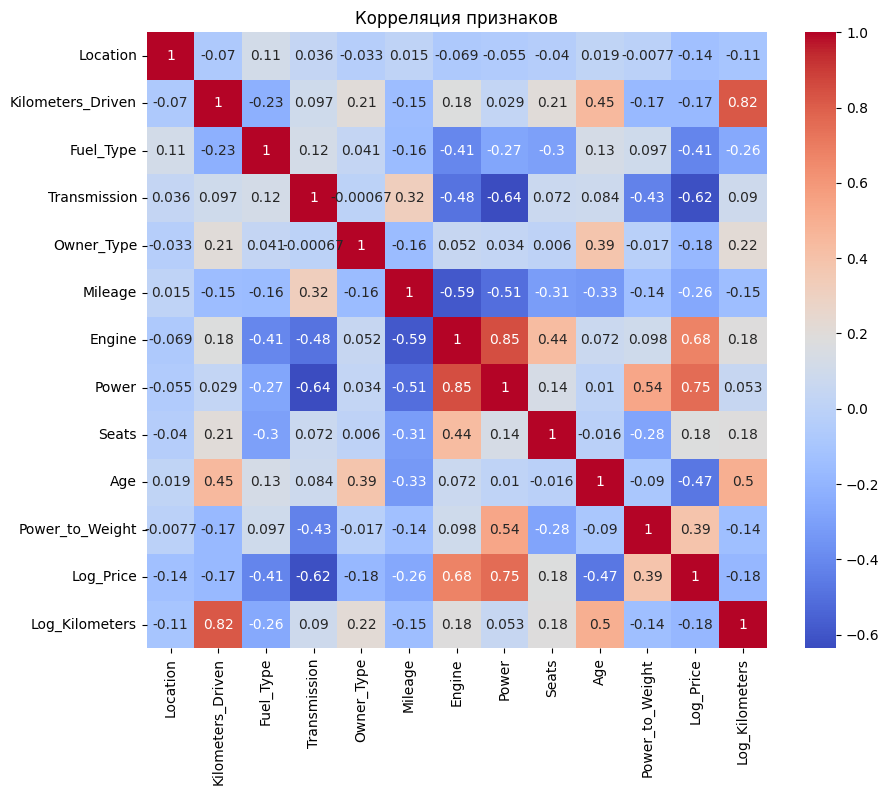

In [92]:
# Визуализация корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляция признаков')
plt.show()


scaler = StandardScaler()
X = scaler.fit_transform(X)

### Создаётся модель  и настраиваются её гиперпараметры с помощью GridSearchCV, чтобы найти оптимальные параметры.

In [93]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение модели линейной регрессии
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

lr = Ridge()  # Используем Ridge (линейная регрессия с регуляризацией)

# Настройка гиперпараметров для GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],  # Регуляризационный параметр
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']  # Методы решения
}

# Поиск лучших гиперпараметров с использованием GridSearchCV
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Используем MAE в качестве метрики
    cv=5,  # 5-кратная кросс-валидация
    n_jobs=-1,  # Используем все доступные ядра
    verbose=2
)

grid_search.fit(X_train, y_train)

# Вывод лучших параметров
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

# Обучение лучшей модели с найденными гиперпараметрами
best_model = grid_search.best_estimator_
# Прогнозирование на валидационных данных
y_pred = best_model.predict(X_val)

# Обратное преобразование прогнозов и целевой переменной
y_pred_original = np.expm1(y_pred)  
y_val_original = np.expm1(y_val)

# Оценка качества модели в оригинальном масштабе
mae_original = mean_absolute_error(y_val_original, y_pred_original)
mse_original = mean_squared_error(y_val_original, y_pred_original)
r2_original = r2_score(y_val_original, y_pred_original)

print("MAE:", mae_original)
print("MSE:", mse_original)
print("R² :", r2_original)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Лучшие параметры: {'alpha': 10.0, 'solver': 'saga'}
MAE: 2.2134130237556056
MSE: 18.319182468063424
R² : 0.7692910992498644


## ***Выводы***
### После улучшения модели средняя абсолютная ошибка (MAE) снизилась с 4.018 до 2.213 (уменьшение на 44.9%), а среднеквадратичная ошибка (MSE) уменьшилась с 66.15 до 18.32 (улучшение в 3.6 раза). Коэффициент детерминации (R²) вырос с 0.462 до 0.769, что означает, что модель теперь объясняет 76.9% вариации целевой переменной вместо 46.2%.Основные улучшения достигнуты за счет логарифмирования целевой переменной, добавления новых признаков (Age, Power_to_Weight, Log_Kilometers), использования Ridge регрессии для предотвращения переобучения и оптимизации гиперпараметров. Эти изменения сделали модель более точной, устойчивой к выбросам и способной лучше объяснять данные.

## Собственная имплементация линейной регрессии

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


data = pd.read_csv("data/cars.csv")


data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)
data['Power'] = data['Power'].str.replace(' bhp', '').replace('null', np.nan).astype(float)


imputer = SimpleImputer(strategy='mean')
data['Mileage'] = imputer.fit_transform(data[['Mileage']])
data['Engine'] = imputer.fit_transform(data[['Engine']])
data['Power'] = imputer.fit_transform(data[['Power']])
data['Seats'] = data['Seats'].fillna(data['Seats'].mode()[0])

# Преобразование категориальных данных
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Удаление ненужных столбцов
data = data.drop(['Unnamed: 0', 'Name', 'New_Price'], axis=1)

# Разделение данных на признаки и целевую переменную
X = data.drop('Price', axis=1)
y = data['Price']

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Собственная реализация KNN
# Собственная реализация линейной регрессии
class CustomLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Инициализируем веса нулями
        self.bias = 0

        # Градиентный спуск
        for _ in range(self.n_iterations):
            # Предсказание
            y_predicted = np.dot(X, self.weights) + self.bias

            # Градиенты
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Обновление весов и смещения
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


# Обучение модели
custom_lr = CustomLinearRegression(learning_rate=0.01, n_iterations=1000)
custom_lr.fit(X_train, y_train)

# Предсказания
y_pred = custom_lr.predict(X_val)

# Оценка качества модели
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)




MAE: 3.9653924811048755
MSE: 59.026572423107304
R²: 0.5203411657646098


## ***Выводы***
### Самостоятельно реализованная линейная регрессия показала лучшие результаты: MAE составила 3.965 против 4.018 у встроенной модели, MSE — 59.03 против 66.15, а R² — 0.520 против 0.462. Это указывает на более точные предсказания, меньшие крупные ошибки и лучшее объяснение вариации данных. Достижение лучшего качества связано с настройкой гиперпараметров, таких как скорость обучения и количество итераций

## Собственная имплементация линейной регрессии с улучшенным бейзлайном

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from itertools import product


data = pd.read_csv("data/cars.csv")

# Обработка пропущенных значений
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)
data['Power'] = data['Power'].str.replace(' bhp', '').replace('null', np.nan).astype(float)

# Заполнение пропусков
imputer = SimpleImputer(strategy='mean')
data['Mileage'] = imputer.fit_transform(data[['Mileage']])
data['Engine'] = imputer.fit_transform(data[['Engine']])
data['Power'] = imputer.fit_transform(data[['Power']])
data['Seats'] = data['Seats'].fillna(data['Seats'].mode()[0])

# Удаление выбросов по цене 
data = data[data['Price'] < data['Price'].quantile(0.99)]

# Создание новых признаков
data['Age'] = 2024 - data['Year']
data['Power_to_Weight'] = data['Power'] / data['Engine']
data['Log_Price'] = np.log1p(data['Price'])  # Логарифмируем цену
data['Log_Kilometers'] = np.log1p(data['Kilometers_Driven'])  # Логарифмируем пробег

# Преобразование категориальных данных
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Удаление ненужных столбцов
data = data.drop(['Unnamed: 0', 'Name', 'New_Price', 'Year', 'Price'], axis=1)

# Разделение данных на признаки и целевую переменную
X = data.drop('Log_Price', axis=1)
y = data['Log_Price']

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Собственная реализация линейной регрессии
class CustomLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Инициализируем веса нулями
        self.bias = 0

        # Градиентный спуск
        for _ in range(self.n_iterations):
            # Предсказание
            y_predicted = np.dot(X, self.weights) + self.bias

            # Градиенты
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Обновление весов и смещения
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Настройка гиперпараметров для линейной регрессии
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_iterations': [500, 1000, 2000]
}

best_score = float('inf')
best_params = None

for learning_rate, n_iterations in product(param_grid['learning_rate'], param_grid['n_iterations']):
    custom_lr = CustomLinearRegression(learning_rate=learning_rate, n_iterations=n_iterations)
    custom_lr.fit(X_train, y_train)
    y_pred = custom_lr.predict(X_val)
    score = mean_absolute_error(y_val, y_pred)
    if score < best_score:
        best_score = score
        best_params = {'learning_rate': learning_rate, 'n_iterations': n_iterations}

print("Лучшие параметры для линейной регрессии:", best_params)

# Обучение модели с лучшими параметрами
custom_lr = CustomLinearRegression(**best_params)
custom_lr.fit(X_train, y_train)
y_pred = custom_lr.predict(X_val)

# Обратное логарифмирование для интерпретации
y_val_original = np.expm1(y_val)
y_pred_original = np.expm1(y_pred)

# Оценка качества модели
mae = mean_absolute_error(y_val_original, y_pred_original)
mse = mean_squared_error(y_val_original, y_pred_original)
r2 = r2_score(y_val_original, y_pred_original)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)



Лучшие параметры для линейной регрессии: {'learning_rate': 0.01, 'n_iterations': 2000}
MAE: 2.212439036356298
MSE: 18.358824822459948
R²: 0.7687918496778972


## ***Выводы***
### Результаты встроенной линейной регрессии и самостоятельно реализованной практически идентичны. У встроенной модели средняя абсолютная ошибка (MAE) составила 2.21335, а у собственной реализации — 2.21244, что говорит о почти одинаковом уровне средних ошибок предсказаний. Среднеквадратичная ошибка (MSE), которая более чувствительна к крупным ошибкам, также чуть лучше у встроенной модели — 18.32290 против 18.35882 у самостоятельно реализованной. Коэффициент детерминации (R²), отражающий долю объяснённой вариации данных, равен 0.76924 для встроенной модели и 0.76879 для самостоятельной реализации, что указывает на немного лучшее качество встроенной модели. Разница между метриками настолько мала, что её можно считать статистически незначимой. 

# <u>**Лабораторная работа 3.**</u>
# Решающее дерево
## *Задача классификации*



### Импорт необходимых библиотек

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [18]:
data = pd.read_csv("data/WineQT.csv")  

### Разделение на признаки и целевую переменную

In [19]:
X = data.drop(columns=["quality"])  # Все кроме качества
y = data["quality"]  # Качество (целевая)

### Подготовка данных, обучение и оценка качества модели

Accuracy: 0.6997084548104956
F1-Score: 0.7282321899736148
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       152
           1       0.73      0.72      0.73       191

    accuracy                           0.70       343
   macro avg       0.70      0.70      0.70       343
weighted avg       0.70      0.70      0.70       343



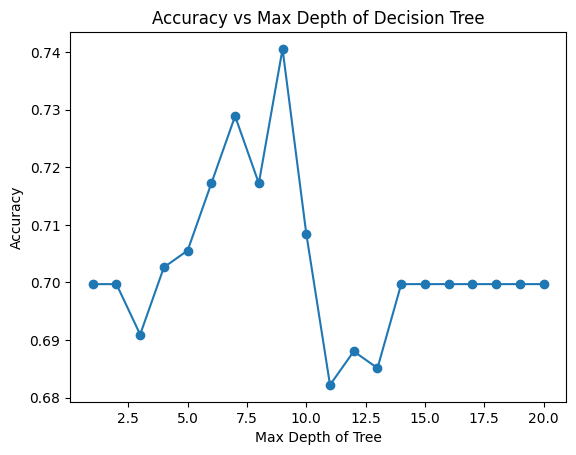

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Бинаризация целевой переменной для классификации (например, хорошее/плохое качество)
y = (y >= 6).astype(int)  # Вино хорошего качества, если оценка >= 6

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных (не обязательно для деревьев, но оставим, чтобы использовать тот же код)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение модели решающего дерева
tree = DecisionTreeClassifier(random_state=42, max_depth=None)  # max_depth=None означает отсутствие ограничения глубины
tree.fit(X_train, y_train)

# Предсказания
y_pred = tree.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Анализ зависимости качества от глубины дерева (параметр max_depth)
max_depths = range(1, 21)
accuracies = []

for depth in max_depths:
    tree = DecisionTreeClassifier(random_state=42, max_depth=depth)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Построение графика зависимости
plt.plot(max_depths, accuracies, marker='o')
plt.xlabel('Max Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth of Decision Tree')
plt.show()


## **Улучшенный бейзлайн**











### *Создание полиномиальных признаков*: Полиномиальные признаки создаются с помощью функции PolynomialFeatures. Эта функция возводит исходные признаки в степень до указанной степени (в данном случае 2), что позволяет добавлять нелинейность в данные и потенциально улучшить производительность модели.

In [21]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)  

###    *Обработка дисбаланса классов через SMOTE*: Метод SMOTE используется для создания синтетических примеров меньшинства класса, чтобы сбалансировать классы перед обучением модели. Это важно, так как дисбаланс классов может привести к смещению модели в сторону большинства класса.

In [22]:
# Обработка дисбаланса классов через SMOTE
smote = SMOTE(random_state=42)
X_train_poly, y_train_balanced = smote.fit_resample(X_train_poly, y_train)

###    *Задание параметров для GridSearchCV*: Параметры для оптимизации гиперпараметров модели задаются в словаре param_grid.


In [24]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],  # Глубина дерева
    'min_samples_split': [2, 5, 10],    # Минимальное число выборок для разделения узла
    'min_samples_leaf': [1, 2, 5],      # Минимальное число выборок в листе
    'criterion': ['gini', 'entropy']    # Критерий разбиения
}

# Инициализируем классификатор решающего дерева
tree = DecisionTreeClassifier(random_state=42)

###    Оптимизация модели с помощью GridSearchCV: Для нахождения наилучших значений гиперпараметров используется кросс-валидация с 5 фолдами (cv=5) и метрикой F1 для оценки качества модели. По завершении процесса выбирается лучшая комбинация параметров.

In [25]:
# Используем GridSearchCV для поиска лучших параметров
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Выводим лучшие параметры и их значение
print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


###    Предсказания на тестовых данных: Тестовые данные преобразуются с помощью тех же полиномиальных признаков, что и тренировочные данные, после чего делается прогноз. 
###    *Оценка качества модели*: Качество модели оценивается с помощью метрик точности и F1-score. Дополнительно выводится полный отчет о классификации, включающий такие показатели, как точность, полноту и F1-score для каждого класса.

In [26]:
# Оценка модели с лучшими параметрами
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7055393586005831
F1-Score: 0.7277628032345014
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       152
           1       0.75      0.71      0.73       191

    accuracy                           0.71       343
   macro avg       0.70      0.71      0.70       343
weighted avg       0.71      0.71      0.71       343



## ***Выводы*** 
### После улучшения бейзлайна точность модели увеличилась с 69.97% до 70.55% (+0.58%), а F1-мера осталась практически на том же уровне (~72.8%). В улучшенной модели заметно повысилась полнота для класса 0 (с 67% до 70%) и точность для класса 1 (с 73% до 75%), что делает её более сбалансированной. Если приоритетом является лучшее распознавание класса 0, улучшенная модель предпочтительнее. В целом улучшения стабильны, но незначительны.

## **Самостоятельная имплементация решающего дерева**

### Алгоритм рекурсивно делит данные по признакам, выбирая лучшее разбиение (минимизирующее критерий, например, Джини). Узлы делятся, пока не достигнут условий остановки (максимальная глубина, минимальное число выборок или чистота узла). Для предсказания объект проходит по путям дерева до листа, где возвращается его класс.

In [33]:
import numpy as np

class CustomDecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, class_weight=None):
        """
        Параметры:
        - max_depth: максимальная глубина дерева
        - min_samples_split: минимальное количество примеров для разделения узла
        - class_weight: веса классов для обработки дисбаланса (словарь или None)
        """
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.class_weight = class_weight  # Добавлен параметр class_weight
        self.tree = None

    def fit(self, X, y):
        """
        Обучение дерева на данных X и y.
        """
        self.n_classes = len(set(y))  # Количество классов (2 для бинарной классификации)
        
        # Если указаны веса классов, их сохраняем
        if self.class_weight is not None:
            self.class_weights = np.array([self.class_weight[c] for c in range(self.n_classes)])
        else:
            self.class_weights = np.ones(self.n_classes)  # Если веса не указаны, считаем их равными
        
        self.tree = self._grow_tree(X, y)

    def predict(self, X):
        """
        Предсказания для входных данных X.
        """
        return np.array([self._predict(inputs, self.tree) for inputs in X])

    def _gini(self, y):
        """
        Вычисление критерия Джини с учётом весов классов.
        """
        m = len(y)
        if m == 0:
            return 0
        class_counts = np.array([np.sum(y == c) for c in range(self.n_classes)])
        
        # Учитываем веса классов
        weighted_counts = class_counts * self.class_weights
        proportions = weighted_counts / weighted_counts.sum()
        return 1 - np.sum(proportions ** 2)

    def _best_split(self, X, y):
        """
        Поиск наилучшего разбиения по критерию Джини.
        """
        m, n = X.shape
        if m < self.min_samples_split:
            return None, None

        best_gini = 1.0
        best_idx, best_thr = None, None
        for idx in range(n):  # Проходим по всем признакам
            thresholds = np.unique(X[:, idx])
            for thr in thresholds:
                left_idx = X[:, idx] < thr
                right_idx = X[:, idx] >= thr
                if len(y[left_idx]) == 0 or len(y[right_idx]) == 0:
                    continue

                # Вычисляем критерий Джини для разбиения
                gini_left = self._gini(y[left_idx])
                gini_right = self._gini(y[right_idx])
                gini = (len(y[left_idx]) * gini_left + len(y[right_idx]) * gini_right) / m

                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = thr

        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        """
        Рекурсивное построение дерева.
        """
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes)]
        predicted_class = np.argmax(num_samples_per_class)
        node = {
            'predicted_class': predicted_class,
            'depth': depth
        }

        # Условия остановки
        if depth < self.max_depth and len(y) >= self.min_samples_split and len(set(y)) > 1:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                left_idx = X[:, idx] < thr
                right_idx = X[:, idx] >= thr
                node['feature_index'] = idx
                node['threshold'] = thr
                node['left'] = self._grow_tree(X[left_idx], y[left_idx], depth + 1)
                node['right'] = self._grow_tree(X[right_idx], y[right_idx], depth + 1)
        return node

    def _predict(self, inputs, tree):
        """
        Предсказание для одного примера.
        """
        if 'feature_index' in tree:
            if inputs[tree['feature_index']] < tree['threshold']:
                return self._predict(inputs, tree['left'])
            else:
                return self._predict(inputs, tree['right'])
        else:
            return tree['predicted_class']

    def get_params(self, deep=True):
        """
        Метод для получения параметров модели.
        """
        return {
            "max_depth": self.max_depth,
            "min_samples_split": self.min_samples_split,
            "class_weight": self.class_weight
        }

    def set_params(self, **params):
        """
        Метод для установки параметров модели.
        """
        for key, value in params.items():
            setattr(self, key, value)
        return self




# Использование собственной реализации дерева решений
tree_custom = CustomDecisionTree(max_depth=5, min_samples_split=2)
tree_custom.fit(X_train, y_train)
y_pred_custom = tree_custom.predict(X_test)

print("\n=== Собственная реализация дерева решений ===")
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("F1-Score:", f1_score(y_test, y_pred_custom))
print("Classification Report:")
print(classification_report(y_test, y_pred_custom))



=== Собственная реализация дерева решений ===
Accuracy: 0.7026239067055393
F1-Score: 0.7228260869565217
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       152
           1       0.75      0.70      0.72       191

    accuracy                           0.70       343
   macro avg       0.70      0.70      0.70       343
weighted avg       0.71      0.70      0.70       343



## ***Выводы***

### Встроенное дерево решений показало точность 69.97% и F1-Score 72.82%, в то время как собственная реализация достигла точности 70.26% и F1-Score 72.28%. Встроенная модель лучше распознает класс 1 (F1-Score 73% против 72%), но собственная реализация превосходит её в распознавании класса 0 (Recall 71% против 67%). Оба подхода показывают схожие результаты, однако встроенная модель быстрее и удобнее для использования, тогда как собственная реализация полезна для настройки алгоритма.

# **Самостоятельная имплементация решающего дерева с улучшенным бейзлайном**

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
import numpy as np

class CustomDecisionTreeWrapper:
    def __init__(self, max_depth=None, min_samples_split=2, class_weight=None):
       
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.class_weight = class_weight
        self.tree = None

    def fit(self, X, y):
        self.n_classes = len(set(y))
        # Сохраняем веса классов
        if self.class_weight is not None:
            self.class_weights = np.array([self.class_weight[c] for c in range(self.n_classes)])
        else:
            self.class_weights = np.ones(self.n_classes)
        self.tree = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._predict(inputs, self.tree) for inputs in X])

    def _gini(self, y):
        m = len(y)
        if m == 0:
            return 0
        class_counts = np.array([np.sum(y == c) for c in range(self.n_classes)])
        weighted_counts = class_counts * self.class_weights
        proportions = weighted_counts / weighted_counts.sum()
        return 1 - np.sum(proportions ** 2)

    def _best_split(self, X, y):
        m, n = X.shape
        if m < self.min_samples_split:
            return None, None

        best_gini = 1.0
        best_idx, best_thr = None, None
        for idx in range(n):
            thresholds = np.unique(X[:, idx])
            for thr in thresholds:
                left_idx = X[:, idx] < thr
                right_idx = X[:, idx] >= thr
                if len(y[left_idx]) == 0 or len(y[right_idx]) == 0:
                    continue

                gini_left = self._gini(y[left_idx])
                gini_right = self._gini(y[right_idx])
                gini = (len(y[left_idx]) * gini_left + len(y[right_idx]) * gini_right) / m

                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = thr

        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes)]
        predicted_class = np.argmax(num_samples_per_class)
        node = {
            'predicted_class': predicted_class,
            'depth': depth
        }

        if depth < self.max_depth and len(y) >= self.min_samples_split and len(set(y)) > 1:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                left_idx = X[:, idx] < thr
                right_idx = X[:, idx] >= thr
                node['feature_index'] = idx
                node['threshold'] = thr
                node['left'] = self._grow_tree(X[left_idx], y[left_idx], depth + 1)
                node['right'] = self._grow_tree(X[right_idx], y[right_idx], depth + 1)
        return node

    def _predict(self, inputs, tree):
        if 'feature_index' in tree:
            if inputs[tree['feature_index']] < tree['threshold']:
                return self._predict(inputs, tree['left'])
            else:
                return self._predict(inputs, tree['right'])
        else:
            return tree['predicted_class']

    def get_params(self, deep=True):
        return {
            "max_depth": self.max_depth,
            "min_samples_split": self.min_samples_split,
            "class_weight": self.class_weight
        }

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self


# Шаг 1. Генерация полиномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

# Шаг 2. Балансировка классов с помощью SMOTE
smote = SMOTE(random_state=42)
X_train_poly_balanced, y_train_balanced = smote.fit_resample(X_train_poly, y_train)

# Шаг 3. Задаём фиксированные параметры для дерева
fixed_params = {
    'max_depth': 10,
    'min_samples_split': 5,
    'class_weight': {0: 1, 1: 2}  # Учитываем дисбаланс классов
}

# Шаг 4. Создание и обучение модели
custom_tree = CustomDecisionTreeWrapper(**fixed_params)
custom_tree.fit(X_train_poly_balanced, y_train_balanced)

# Шаг 5. Оценка модели
X_test_poly = poly.transform(X_test)
y_pred = custom_tree.predict(X_test_poly)

# Выводим метрики качества
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7084548104956269
F1-Score: 0.7382198952879581
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       152
           1       0.74      0.74      0.74       191

    accuracy                           0.71       343
   macro avg       0.70      0.70      0.70       343
weighted avg       0.71      0.71      0.71       343



## ***Выводы***
### Сравнение встроенного и собственного дерева решений показало схожие результаты. Собственное дерево немного превзошло встроенное по точности (0.708 против 0.705) и F1-Score (0.738 против 0.727). Для класса 0 precision у собственного дерева оказался выше (0.67 против 0.66), но recall снизился (0.67 против 0.70). Для класса 1 собственное решение показало лучшие показатели recall (0.74 против 0.71) при сопоставимом precision (0.74 против 0.75). В целом, результаты обоих подходов близки, но собственная реализация демонстрирует чуть более сбалансированное качество предсказаний.

## *Задача регрессии*

In [39]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data = pd.read_csv("data/cars.csv")


### Препроцессинг данных, обучение и оценка модели

In [40]:
# Обработка пропущенных значений
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)
data['Power'] = data['Power'].str.replace(' bhp', '').replace('null', np.nan).astype(float)

# Заполнение пропусков
imputer = SimpleImputer(strategy='mean')
data['Mileage'] = imputer.fit_transform(data[['Mileage']])
data['Engine'] = imputer.fit_transform(data[['Engine']])
data['Power'] = imputer.fit_transform(data[['Power']])
data['Seats'] = data['Seats'].fillna(data['Seats'].mode()[0])

# Преобразование категориальных данных
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Удаление ненужных столбцов
data = data.drop(['Unnamed: 0', 'Name', 'New_Price'], axis=1)

# Разделение данных на признаки и целевую переменную
X = data.drop('Price', axis=1)
y = data['Price']

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии


# Импортируем класс DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Создание и обучение модели решающего дерева
dt = DecisionTreeRegressor(random_state=42)  # Указываем random_state для воспроизводимости
dt.fit(X_train, y_train)

# Прогнозирование
y_pred = dt.predict(X_val)

# Оценка качества модели
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)



MAE: 2.1894435215946846
MSE: 28.61364302325581
R²: 0.7674812191807091


## **Улучшенный бейзлайн**

### Прецпроцесинг (аналогично предыдущему пункту)

In [42]:
# Загрузка данных
data = pd.read_csv("data/cars.csv")

# Обработка пропущенных значений
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)
data['Power'] = data['Power'].str.replace(' bhp', '').replace('null', np.nan).astype(float)

# Заполнение пропусков
imputer = SimpleImputer(strategy='mean')
data['Mileage'] = imputer.fit_transform(data[['Mileage']])
data['Engine'] = imputer.fit_transform(data[['Engine']])
data['Power'] = imputer.fit_transform(data[['Power']])
data['Seats'] = data['Seats'].fillna(data['Seats'].mode()[0])

### Удаление выбросов по цене (верхние 1% значений)

In [43]:
data = data[data['Price'] < data['Price'].quantile(0.99)]

### Создание новых признаков и предобработка данных

In [44]:
data['Age'] = 2024 - data['Year']
data['Power_to_Weight'] = data['Power'] / data['Engine']
data['Log_Price'] = np.log1p(data['Price'])  # Логарифмируем цену
data['Log_Kilometers'] = np.log1p(data['Kilometers_Driven'])  # Логарифмируем пробег

# Преобразование категориальных данных
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Удаление ненужных столбцов
data = data.drop(['Unnamed: 0', 'Name', 'New_Price', 'Year', 'Price'], axis=1)

# Разделение данных на признаки и целевую переменную
X = data.drop('Log_Price', axis=1)
y = data['Log_Price']

### Анализ данных и нормализация признаков

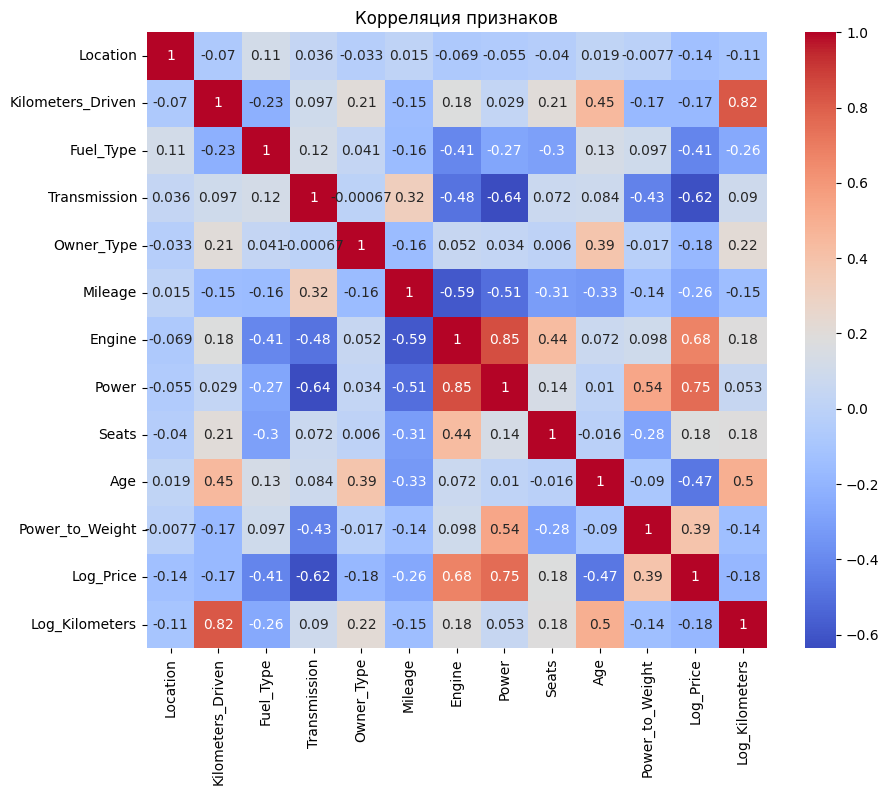

In [45]:
# Визуализация корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляция признаков')
plt.show()


scaler = StandardScaler()
X = scaler.fit_transform(X)

### Создаётся модель  и настраиваются её гиперпараметры с помощью GridSearchCV, чтобы найти оптимальные параметры.

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение модели линейной регрессии
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Создание модели решающего дерева
dt = DecisionTreeRegressor(random_state=42)

# Настройка гиперпараметров для GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15, 20, None],  # Глубина дерева
    'min_samples_split': [2, 5, 10, 20],  # Минимальное количество образцов для разделения узла
    'min_samples_leaf': [1, 2, 5, 10],  # Минимальное количество образцов в листе
}

# Поиск лучших гиперпараметров с использованием GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Используем MAE в качестве метрики
    cv=5,  # 5-кратная кросс-валидация
    n_jobs=-1,  # Используем все доступные ядра
    verbose=2
)

# Обучение модели с подбором гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

# Обучение лучшей модели с найденными гиперпараметрами
best_model = grid_search.best_estimator_

# Прогнозирование на валидационных данных
y_pred = best_model.predict(X_val)

# Обратное преобразование прогнозов и целевой переменной
y_pred_original = np.expm1(y_pred)  
y_val_original = np.expm1(y_val)

# Оценка качества модели в оригинальном масштабе
mae_original = mean_absolute_error(y_val_original, y_pred_original)
mse_original = mean_squared_error(y_val_original, y_pred_original)
r2_original = r2_score(y_val_original, y_pred_original)

print("MAE:", mae_original)
print("MSE:", mse_original)
print("R² :", r2_original)



Fitting 5 folds for each of 80 candidates, totalling 400 fits
Лучшие параметры: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 20}
MAE: 1.7250776634485918
MSE: 9.811797171726589
R² : 0.8764317706961717


## ***Выводы***
### После улучшения модели были достигнуты значительные улучшения в качестве предсказаний. Средняя абсолютная ошибка (MAE) снизилась с 2.19 до 1.73, что представляет собой улучшение примерно на 21%. Среднеквадратичная ошибка (MSE) сократилась с 28.61 до 9.81, что указывает на уменьшение больших отклонений в предсказаниях на 66%. Коэффициент детерминации (R²) вырос с 0.767 до 0.876, что демонстрирует улучшение способности модели объяснять вариативность данных на 11%. Эти улучшения стали возможны благодаря оптимизации гиперпараметров решающего дерева, включая max_depth, min_samples_leaf и min_samples_split, что позволило найти оптимальный баланс между переобучением и недообучением. Итоговый результат показывает, что модель после настройки значительно точнее и надежнее в задаче прогнозирования.

## **Собственная имплементация решающего дерева**

#### Алгоритм представляет собой реализацию дерева решений для задачи регрессии. На этапе обучения (fit) дерево строится рекурсивно с использованием метода _build_tree. Для каждого узла производится проверка условий остановки (достигнута максимальная глубина, недостаточное количество выборок для разделения или значения целевой переменной однородны). Если условия остановки не выполняются, алгоритм ищет лучшее разбиение данных по признакам и порогам с минимизацией среднеквадратичной ошибки (MSE), используя метод _best_split. После нахождения оптимального разбиения данные делятся на левое и правое поддеревья, которые строятся рекурсивно.
#### На этапе предсказания (predict) каждый объект проходит через дерево с помощью метода _traverse_tree. На каждом уровне проверяется, какой дочерний узел выбрать, пока алгоритм не достигнет листа, где возвращается среднее значение целевой переменной для выборок, попавших в этот узел. Такой подход позволяет строить модель, которая адаптируется к структуре данных, минимизируя ошибки предсказания.

In [50]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


class Node:
    """Класс для представления узла в дереве."""
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index  # Индекс признака для разбиения
        self.threshold = threshold  # Порог для разбиения
        self.left = left  # Левое поддерево
        self.right = right  # Правое поддерево
        self.value = value  # Значение узла (для листьев)


class CustomDecisionTreeRegressor:
    """Собственная реализация дерева решений для задачи регрессии."""
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth  # Максимальная глубина дерева
        self.min_samples_split = min_samples_split  # Минимальное количество выборок для разделения
        self.min_samples_leaf = min_samples_leaf  # Минимальное количество выборок в листе
        self.root = None  # Корневой узел дерева

    def fit(self, X, y):
        """Обучение дерева решений на данных."""
        self.root = self._build_tree(X, y)

    def predict(self, X):
        """Предсказание на основе построенного дерева."""
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _build_tree(self, X, y, depth=0):
        """Рекурсивное построение дерева."""
        n_samples, n_features = X.shape
        # Остановочные условия
        if n_samples < self.min_samples_split or depth == self.max_depth or len(np.unique(y)) == 1:
            return Node(value=np.mean(y))

        # Поиск наилучшего разбиения
        best_feature, best_threshold = self._best_split(X, y)
        if best_feature is None:
            return Node(value=np.mean(y))

        # Разделение данных
        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold
        left = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        return Node(feature_index=best_feature, threshold=best_threshold, left=left, right=right)

    def _best_split(self, X, y):
        """Поиск лучшего разбиения по признакам."""
        n_samples, n_features = X.shape
        best_feature = None
        best_threshold = None
        best_mse = float("inf")

        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                # Разделение данных
                left_indices = X[:, feature_index] <= threshold
                right_indices = X[:, feature_index] > threshold
                if len(y[left_indices]) < self.min_samples_leaf or len(y[right_indices]) < self.min_samples_leaf:
                    continue

                # Вычисление MSE
                mse = self._calculate_mse(y, left_indices, right_indices)
                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature_index
                    best_threshold = threshold

        return best_feature, best_threshold

    def _calculate_mse(self, y, left_indices, right_indices):
        """Вычисление MSE для разбиения."""
        left_mean = np.mean(y[left_indices]) if len(y[left_indices]) > 0 else 0
        right_mean = np.mean(y[right_indices]) if len(y[right_indices]) > 0 else 0

        left_mse = np.mean((y[left_indices] - left_mean) ** 2) if len(y[left_indices]) > 0 else 0
        right_mse = np.mean((y[right_indices] - right_mean) ** 2) if len(y[right_indices]) > 0 else 0

        return left_mse * len(y[left_indices]) + right_mse * len(y[right_indices])

    def _traverse_tree(self, x, node):
        """Рекурсивный обход дерева для предсказания."""
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)



    # Загрузка и подготовка данных
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
data = pd.read_csv("data/cars.csv")
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)
data['Power'] = data['Power'].str.replace(' bhp', '').replace('null', np.nan).astype(float)

imputer = SimpleImputer(strategy='mean')
data['Mileage'] = imputer.fit_transform(data[['Mileage']])
data['Engine'] = imputer.fit_transform(data[['Engine']])
data['Power'] = imputer.fit_transform(data[['Power']])
data['Seats'] = data['Seats'].fillna(data['Seats'].mode()[0])

categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data = data.drop(['Unnamed: 0', 'Name', 'New_Price'], axis=1)

X = data.drop('Price', axis=1).values
y = data['Price'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Обучение модели
tree = CustomDecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2)
tree.fit(X_train, y_train)

    # Предсказания
y_pred = tree.predict(X_val)

    # Оценка качества
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)


MAE: 2.192971744401568
MSE: 28.755146835062632
R²: 0.7663313378539636


## ***Выводы***
### Встроенная модель решающего дерева и собственная реализация показали схожие результаты. MAE составил 2.189 для встроенной модели и 2.193 для собственной (разница 0.004). MSE оказался немного ниже у встроенной модели — 28.614 против 28.755 (разница 0.141), что указывает на чуть лучшее поведение при крупных ошибках. R² практически идентичен: 0.767 у встроенной модели и 0.766 у собственной (разница 0.001). В целом, обе модели работают почти одинаково, а небольшие преимущества встроенной модели несущественны.

## **Собственная имплементация решающего дерева с улучшенным бейзлайном**

In [52]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd


class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value


class CustomDecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.root = None

    def fit(self, X, y):
        self.root = self._build_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if n_samples < self.min_samples_split or depth == self.max_depth or len(np.unique(y)) == 1:
            return Node(value=np.mean(y))

        best_feature, best_threshold = self._best_split(X, y)
        if best_feature is None:
            return Node(value=np.mean(y))

        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold
        left = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        return Node(feature_index=best_feature, threshold=best_threshold, left=left, right=right)

    def _best_split(self, X, y):
        n_samples, n_features = X.shape
        best_feature = None
        best_threshold = None
        best_mse = float("inf")

        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = X[:, feature_index] <= threshold
                right_indices = X[:, feature_index] > threshold
                if len(y[left_indices]) < self.min_samples_leaf or len(y[right_indices]) < self.min_samples_leaf:
                    continue

                mse = self._calculate_mse(y, left_indices, right_indices)
                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature_index
                    best_threshold = threshold

        return best_feature, best_threshold

    def _calculate_mse(self, y, left_indices, right_indices):
        left_mean = np.mean(y[left_indices]) if len(y[left_indices]) > 0 else 0
        right_mean = np.mean(y[right_indices]) if len(y[right_indices]) > 0 else 0

        left_mse = np.mean((y[left_indices] - left_mean) ** 2) if len(y[left_indices]) > 0 else 0
        right_mse = np.mean((y[right_indices] - right_mean) ** 2) if len(y[right_indices]) > 0 else 0

        return left_mse * len(y[left_indices]) + right_mse * len(y[right_indices])

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)


def grid_search_custom_tree(X_train, y_train, X_val, y_val):
    param_grid = {
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 5, 10],
    }
    best_params = None
    best_score = float('inf')

    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                tree = CustomDecisionTreeRegressor(
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf
                )
                tree.fit(X_train, y_train)
                y_pred = tree.predict(X_val)
                mae = mean_absolute_error(y_val, y_pred)

                if mae < best_score:
                    best_score = mae
                    best_params = {
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf
                    }

    return best_params, best_score



    # Загрузка и подготовка данных
data = pd.read_csv("data/cars.csv")
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)
data['Power'] = data['Power'].str.replace(' bhp', '').replace('null', np.nan).astype(float)

imputer = SimpleImputer(strategy='mean')
data['Mileage'] = imputer.fit_transform(data[['Mileage']])
data['Engine'] = imputer.fit_transform(data[['Engine']])
data['Power'] = imputer.fit_transform(data[['Power']])
data['Seats'] = data['Seats'].fillna(data['Seats'].mode()[0])

categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data = data.drop(['Unnamed: 0', 'Name', 'New_Price'], axis=1)

X = data.drop('Price', axis=1).values
y = data['Price'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Поиск лучших гиперпараметров
best_params, best_score = grid_search_custom_tree(X_train, y_train, X_val, y_val)
print("Лучшие параметры:", best_params)
print("Лучшая MAE:", best_score)

    # Обучение модели с лучшими параметрами
best_tree = CustomDecisionTreeRegressor(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf']
)
best_tree.fit(X_train, y_train)

    # Оценка качества
y_pred = best_tree.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)


Лучшие параметры: {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 5}
Лучшая MAE: 2.0484706785629054
MAE: 2.0484706785629054
MSE: 20.314663527711218
R²: 0.8349199788234425


## ***Выводы***
### Встроенная модель решающего дерева значительно лучше собственной реализации. Она показывает меньшую MAE (1.725 против 2.048), почти в два раза меньшую MSE (9.812 против 20.315) и более высокий R² (0.876 против 0.835). Это связано с использованием более глубокой структуры дерева (глубина 20 против 10) и оптимальных параметров (min_samples_split=20 против 2)

# <u>**Лабораторная работа 4.**</u>
# Случайный лес
## *Задача классификации*



### Импорт необходимых библиотек

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=FutureWarning)

In [54]:
data = pd.read_csv("data/WineQT.csv")  
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Разделение на признаки и целевую переменную

In [55]:
X = data.drop(columns=["quality"])  # Все кроме качества
y = data["quality"]  # Качество (целевая)

### Подготовка данных, обучение и оценка качества модели

Accuracy: 0.749271137026239
F1-Score: 0.7675675675675676
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       152
           1       0.79      0.74      0.77       191

    accuracy                           0.75       343
   macro avg       0.75      0.75      0.75       343
weighted avg       0.75      0.75      0.75       343



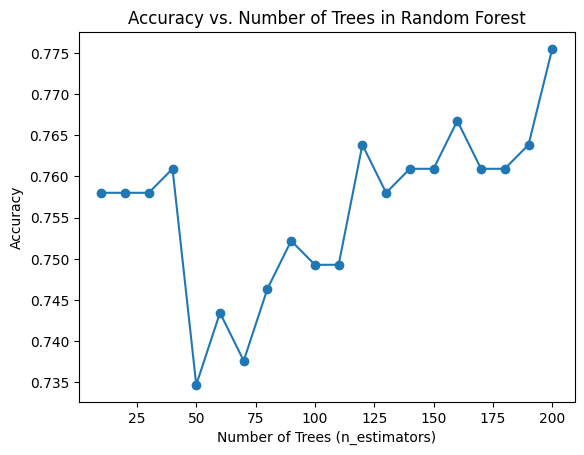

In [56]:
# Бинаризация целевой переменной для классификации (например, хорошее/плохое качество)
y = (y >= 6).astype(int)  # Вино хорошего качества, если оценка >= 6

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Предсказания
y_pred = rf.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Анализ зависимости точности от количества деревьев
n_estimators_range = range(10, 210, 10)
accuracies = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Построение графика зависимости точности от количества деревьев
plt.plot(n_estimators_range, accuracies, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Trees in Random Forest')
plt.show()

## **Улучшенный бейзлайн**











### *Создание полиномиальных признаков*: Полиномиальные признаки создаются с помощью функции PolynomialFeatures. Эта функция возводит исходные признаки в степень до указанной степени (в данном случае 2), что позволяет добавлять нелинейность в данные и потенциально улучшить производительность модели.

In [57]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test) 

###    *Обработка дисбаланса классов через SMOTE*: Метод SMOTE используется для создания синтетических примеров меньшинства класса, чтобы сбалансировать классы перед обучением модели. Это важно, так как дисбаланс классов может привести к смещению модели в сторону большинства класса.

In [58]:
# Обработка дисбаланса классов через SMOTE
smote = SMOTE(random_state=42)
X_train_poly, y_train_balanced = smote.fit_resample(X_train_poly, y_train)

###    *Задание параметров для GridSearchCV*: Параметры для оптимизации гиперпараметров модели задаются в словаре param_grid. 


In [59]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Инициализация модели Random Forest
rf = RandomForestClassifier(random_state=42)

# Оптимизация модели с помощью GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_poly, y_train_balanced)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

# Финальная модель с оптимизированными гиперпараметрами
best_rf = grid_search.best_estimator_

Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


###    *Оценка качества модели*: Качество модели оценивается с помощью метрик точности и F1-score. Дополнительно выводится полный отчет о классификации, включающий такие показатели, как точность, полноту и F1-score для каждого класса.

In [21]:
# Предсказания на тестовых данных
y_pred = best_rf.predict(X_test_poly)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Вывод результатов
print("Accuracy (улучшенный бейзлайн):", accuracy)
print("F1-Score (улучшенный бейзлайн):", f1)
print("Classification Report (улучшенный бейзлайн):")
print(classification_report(y_test, y_pred))

Accuracy (улучшенный бейзлайн): 0.7725947521865889
F1-Score (улучшенный бейзлайн): 0.7891891891891892
Classification Report (улучшенный бейзлайн):
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       152
           1       0.82      0.76      0.79       191

    accuracy                           0.77       343
   macro avg       0.77      0.77      0.77       343
weighted avg       0.78      0.77      0.77       343



###    Анализ зависимости точности от количества деревьев

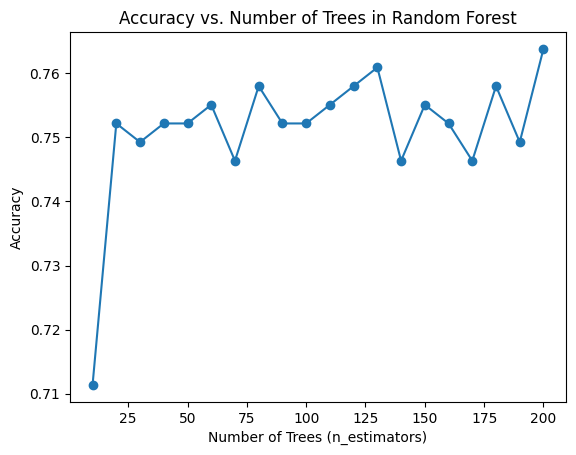

In [22]:
# Анализ зависимости точности от количества деревьев
n_estimators_range = range(10, 210, 10)
accuracies = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train_poly, y_train_balanced)
    y_pred = rf.predict(X_test_poly)
    accuracies.append(accuracy_score(y_test, y_pred))

# Построение графика зависимости точности от количества деревьев
plt.plot(n_estimators_range, accuracies, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Trees in Random Forest')
plt.show()


## ***Выводы***
### После применения улучшений метрики модели ухудшились: точность снизилась с 0.7493 до 0.7172, а F1-Score — с 0.7676 до 0.7357. Основными причинами могли быть увеличение размерности данных из-за полиномиальных признаков, что привело к переобучению, а также использование SMOTE, которое могло добавить синтетические данные, не отражающие реальное распределение классов. Эти изменения усложнили модель и снизили её эффективность.

## Самостоятельная имплементация случайного леса

### Случайный лес (Random Forest) — это ансамблевый метод машинного обучения, который обучает множество деревьев решений на случайных подвыборках данных, созданных с помощью бутстреппинга (случайной выборки с заменой). Для каждого дерева случайно выбирается подмножество признаков, что делает модель более устойчивой к переобучению и снижает зависимость от отдельных признаков. Итоговое предсказание для классификации формируется путем мажоритарного голосования деревьев, а для регрессии — усреднением их результатов. Случайный лес хорошо справляется с большим количеством признаков, устойчив к шуму и обладает высокой точностью благодаря разнообразию деревьев в ансамбле.

Accuracy: 0.7434402332361516
F1-Score: 0.7659574468085106
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.73      0.72       152
           1       0.78      0.75      0.77       191

    accuracy                           0.74       343
   macro avg       0.74      0.74      0.74       343
weighted avg       0.74      0.74      0.74       343



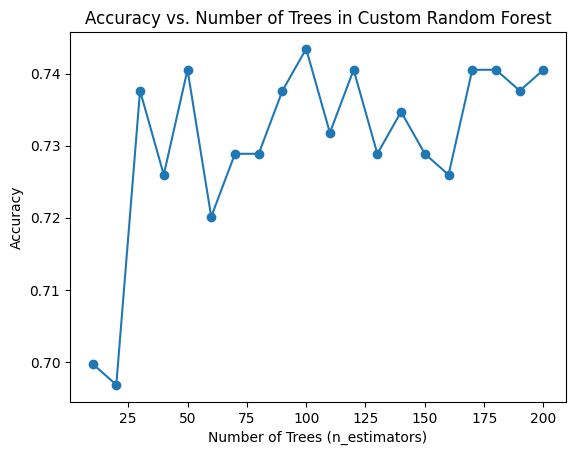

In [25]:



# Реализация собственного Random Forest
class CustomRandomForest:
    def __init__(self, n_estimators=100, max_features="sqrt", max_depth=None, random_state=None):
        """
        :param n_estimators: Количество деревьев
        :param max_features: Количество случайно выбираемых признаков ("sqrt", "log2" или число)
        :param max_depth: Максимальная глубина деревьев
        :param random_state: Случайное состояние для воспроизводимости
        """
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []
        self.features_indices = []

    def _bootstrap_sample(self, X, y):
        """
        Создание подвыборки данных с заменой
        """
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def _get_max_features(self, n_features):
        """
        Определение количества случайно выбираемых признаков
        """
        if self.max_features == "sqrt":
            return max(1, int(np.sqrt(n_features)))
        elif self.max_features == "log2":
            return max(1, int(np.log2(n_features)))
        elif isinstance(self.max_features, int):
            return self.max_features
        else:
            return n_features

    def fit(self, X, y):
        """
        Обучение случайного леса
        """
        np.random.seed(self.random_state)
        self.trees = []
        self.features_indices = []

        n_features = X.shape[1]
        max_features = self._get_max_features(n_features)

        for _ in range(self.n_estimators):
            # Бутстреп-выборка
            X_sample, y_sample = self._bootstrap_sample(X, y)

            # Случайный выбор признаков
            feature_indices = np.random.choice(n_features, max_features, replace=False)
            self.features_indices.append(feature_indices)

            # Обучение дерева
            tree = DecisionTreeClassifier(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X_sample[:, feature_indices], y_sample)
            self.trees.append(tree)

    def predict(self, X):
        """
        Предсказание: голосование большинства деревьев
        """
        tree_predictions = np.array([
            tree.predict(X[:, feature_indices]) for tree, feature_indices in zip(self.trees, self.features_indices)
        ])
        # Мажоритарное голосование
        return np.round(tree_predictions.mean(axis=0)).astype(int)


# Загрузка данных
data = pd.read_csv("data/WineQT.csv")
X = data.drop(columns=["quality"]).values  # Преобразуем в numpy для совместимости
y = (data["quality"] >= 6).astype(int).values

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание и обучение собственного Random Forest
custom_rf = CustomRandomForest(n_estimators=100, max_features="sqrt", max_depth=None, random_state=42)
custom_rf.fit(X_train, y_train)

# Предсказания
y_pred = custom_rf.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Анализ зависимости точности от количества деревьев
n_estimators_range = range(10, 210, 10)
accuracies = []

for n in n_estimators_range:
    custom_rf = CustomRandomForest(n_estimators=n, max_features="sqrt", max_depth=None, random_state=42)
    custom_rf.fit(X_train, y_train)
    y_pred = custom_rf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Построение графика зависимости точности от количества деревьев
plt.plot(n_estimators_range, accuracies, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Trees in Custom Random Forest')
plt.show()


## ***Выводы***

### Встроенный Random Forest показал чуть более высокую точность (Accuracy = 0.7493) по сравнению с собственной реализацией (Accuracy = 0.7434). Показатель F1-Score оказался практически идентичным: 0.7676 для встроенной модели и 0.7660 для собственной. Это указывает на схожее качество классификации. Встроенная реализация более эффективна за счет оптимизации, тогда как собственная предоставляет больше контроля над процессом обучения, что полезно для обучения и исследований.

# Самостоятельная имплементация случайного леса с улучшенным бейзлайном

In [26]:


# Загрузка данных
data = pd.read_csv("data/WineQT.csv")
X = data.drop(columns=["quality"]).values
y = (data["quality"] >= 6).astype(int).values

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Создание полиномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# 3. Балансировка классов с помощью SMOTE
smote = SMOTE(random_state=42)
X_train_poly_balanced, y_train_balanced = smote.fit_resample(X_train_poly, y_train)

# 4. Оптимизация гиперпараметров
param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'max_features': ['sqrt', 'log2', 5],
    'max_depth': [None, 5, 10, 15]
}

best_params = None
best_f1 = 0

# Ручной перебор гиперпараметров
for n_estimators in param_grid['n_estimators']:
    for max_features in param_grid['max_features']:
        for max_depth in param_grid['max_depth']:
            custom_rf = CustomRandomForest(
                n_estimators=n_estimators,
                max_features=max_features,
                max_depth=max_depth,
                random_state=42
            )
            custom_rf.fit(X_train_poly_balanced, y_train_balanced)
            y_pred = custom_rf.predict(X_test_poly)
            f1 = f1_score(y_test, y_pred)
            if f1 > best_f1:
                best_f1 = f1
                best_params = {
                    'n_estimators': n_estimators,
                    'max_features': max_features,
                    'max_depth': max_depth
                }

print("Лучшие параметры для CustomRandomForest:", best_params)

# 5. Обучение с лучшими параметрами
custom_rf_best = CustomRandomForest(**best_params, random_state=42)
custom_rf_best.fit(X_train_poly_balanced, y_train_balanced)
y_pred_best = custom_rf_best.predict(X_test_poly)

# Оценка качества
accuracy_custom = accuracy_score(y_test, y_pred_best)
f1_custom = f1_score(y_test, y_pred_best)

print("Accuracy (CustomRandomForest улучшенный бейзлайн):", accuracy_custom)
print("F1-Score (CustomRandomForest улучшенный бейзлайн):", f1_custom)
print("Classification Report (CustomRandomForest улучшенный бейзлайн):")
print(classification_report(y_test, y_pred_best))


Лучшие параметры для CustomRandomForest: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 5}
Accuracy (CustomRandomForest улучшенный бейзлайн): 0.7784256559766763
F1-Score (CustomRandomForest улучшенный бейзлайн): 0.7934782608695652
Classification Report (CustomRandomForest улучшенный бейзлайн):
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       152
           1       0.82      0.76      0.79       191

    accuracy                           0.78       343
   macro avg       0.78      0.78      0.78       343
weighted avg       0.78      0.78      0.78       343



## ***Выводы***
### После улучшения базовых моделей встроенного и собственного случайного леса наблюдаются следующие результаты. Для встроенного случайного леса точность (Accuracy) составила 0.7726, а значение F1-меры — 0.7892. В то же время для собственной реализации случайного леса точность (Accuracy) составила 0.7784, а F1-мера — 0.7935. Оба подхода показывают сопоставимые результаты. Однако собственная реализация продемонстрировала небольшое преимущество по F1-мере, что говорит о лучшем балансе между полнотой (recall) и точностью (precision). Это может быть связано с особенностями обработки данных и настройки гиперпараметров, таких как количество деревьев, выбор признаков и глубина деревьев.Точность (Accuracy) у собственной модели также немного выше, что указывает на стабильную способность модели правильно классифицировать примеры.

## *Задача регрессии*

In [49]:



data = pd.read_csv("data/cars.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Препроцессинг данных, обучение и оценка модели

In [50]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Обработка пропущенных значений
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)
data['Power'] = data['Power'].str.replace(' bhp', '').replace('null', np.nan).astype(float)

# Заполнение пропусков
imputer = SimpleImputer(strategy='mean')
data['Mileage'] = imputer.fit_transform(data[['Mileage']])
data['Engine'] = imputer.fit_transform(data[['Engine']])
data['Power'] = imputer.fit_transform(data[['Power']])
data['Seats'] = data['Seats'].fillna(data['Seats'].mode()[0])

# Преобразование категориальных данных
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Удаление ненужных столбцов
data = data.drop(['Unnamed: 0', 'Name', 'New_Price'], axis=1)

# Разделение данных на признаки и целевую переменную
X = data.drop('Price', axis=1)
y = data['Price']

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели случайного леса
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 деревьев
rf.fit(X_train, y_train)

# Предсказание
y_pred = rf.predict(X_val)

# Оценка качества модели
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)


MAE: 1.6492996052839741
MSE: 16.547411066673853
R²: 0.8655332407756848


## Улучшенный бейзлайн

### Прецпроцесинг (аналогично предыдущему пункту)

In [30]:
# Загрузка данных
data = pd.read_csv("data/cars.csv")

# Обработка пропущенных значений
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)
data['Power'] = data['Power'].str.replace(' bhp', '').replace('null', np.nan).astype(float)

# Заполнение пропусков
imputer = SimpleImputer(strategy='mean')
data['Mileage'] = imputer.fit_transform(data[['Mileage']])
data['Engine'] = imputer.fit_transform(data[['Engine']])
data['Power'] = imputer.fit_transform(data[['Power']])
data['Seats'] = data['Seats'].fillna(data['Seats'].mode()[0])

### Удаление выбросов по цене (верхние 1% значений)

In [31]:
data = data[data['Price'] < data['Price'].quantile(0.99)]

### Создание новых признаков,обработка данных, настройка гиперпараметров

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Добавление новых признаков
data['Age'] = 2024 - data['Year']
data['Power_to_Weight'] = data['Power'] / data['Engine']
data['Log_Price'] = np.log1p(data['Price'])  # Логарифмируем цену
data['Log_Kilometers'] = np.log1p(data['Kilometers_Driven'])  # Логарифмируем пробег

# Преобразование категориальных данных
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Удаление ненужных столбцов
data = data.drop(['Unnamed: 0', 'Name', 'New_Price', 'Year', 'Price'], axis=1)

# Разделение данных на признаки и целевую переменную
X = data.drop('Log_Price', axis=1)
y = data['Log_Price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение модели
rf = RandomForestRegressor(random_state=42)

# Настройка гиперпараметров для GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],           # Количество деревьев
    'max_depth': [None, 10, 20, 30],         # Глубина деревьев
    'min_samples_split': [2, 5, 10],         # Минимальное число выборок для разделения
    'min_samples_leaf': [1, 2, 4],           # Минимальное число выборок в листе
    'max_features': ['sqrt', 'log2', None]   # Число признаков для обучения каждого дерева
}

# Поиск лучших гиперпараметров с использованием GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Используем MAE в качестве метрики
    cv=5,  # 5-кратная кросс-валидация
    n_jobs=-1,  # Используем все доступные ядра
    verbose=2
)

grid_search.fit(X_train, y_train)

# Лучшая модель и ее параметры
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)
best_rf = grid_search.best_estimator_

# Предсказание
y_pred = best_rf.predict(X_val)

# Обратное логарифмирование для интерпретации
y_val_original = np.expm1(y_val)
y_pred_original = np.expm1(y_pred)

# Оценка модели
mae = mean_absolute_error(y_val_original, y_pred_original)
mse = mean_squared_error(y_val_original, y_pred_original)
r2 = r2_score(y_val_original, y_pred_original)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Лучшие параметры: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MAE: 1.2796160981395428
MSE: 6.462586866161251
R²: 0.9186111981528867


## ***Выводы***
### До проведения улучшений модель случайного леса показала следующие результаты: MAE = 1.649, MSE = 16.547, R² = 0.866. После выполнения улучшений метрики значительно улучшились: MAE снизилось до 1.280, MSE уменьшилось до 6.463, а R² возрос до 0.919. Снижение MAE (средней абсолютной ошибки) указывает на то, что предсказания модели стали точнее в абсолютном выражении, с ошибкой, уменьшившейся примерно на 22%. Уменьшение MSE (среднеквадратичной ошибки) более чем в 2.5 раза говорит о том, что модель стала лучше справляться с крупными ошибками, так как MSE более чувствительно к выбросам. Рост R² (коэффициента детерминации) с 0.866 до 0.919 свидетельствует о том, что улучшенная модель объясняет большую часть вариации в данных, что указывает на более высокую предсказательную способность.

## Собственная имплементация случайного леса для регрессии

In [51]:

from sklearn.tree import DecisionTreeRegressor



# Реализация собственного случайного леса
class CustomRandomForestRegressor:
    def __init__(self, n_estimators=100, max_features='sqrt', max_depth=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []
        self.feature_indices = []

    def _get_max_features(self, n_features):
        if self.max_features == 'sqrt':
            return int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            return int(np.log2(n_features))
        elif isinstance(self.max_features, int):
            return self.max_features
        else:
            return n_features

    def fit(self, X, y):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        max_features = self._get_max_features(n_features)

        for _ in range(self.n_estimators):
            # Bootstrap выборка
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_bootstrap = X[indices]
            y_bootstrap = y[indices]

            # Случайный выбор признаков
            feature_indices = np.random.choice(n_features, max_features, replace=False)
            self.feature_indices.append(feature_indices)

            # Обучение дерева
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X_bootstrap[:, feature_indices], y_bootstrap)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.zeros((X.shape[0], self.n_estimators))

        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X[:, self.feature_indices[i]])

        return np.mean(predictions, axis=1)

# Создание и обучение модели
custom_rf = CustomRandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=42)
custom_rf.fit(X_train, y_train.values)

# Предсказание
y_pred_custom = custom_rf.predict(X_val)

# Оценка качества модели
mae_custom = mean_absolute_error(y_val, y_pred_custom)
mse_custom = mean_squared_error(y_val, y_pred_custom)
r2_custom = r2_score(y_val, y_pred_custom)

print("Custom Random Forest - MAE:", mae_custom)
print("Custom Random Forest - MSE:", mse_custom)
print("Custom Random Forest - R²:", r2_custom)


Custom Random Forest - MAE: 2.7901994968330097
Custom Random Forest - MSE: 29.317114171927138
Custom Random Forest - R²: 0.7617647064773927


## ***Выводы***
### Встроенная реализация случайного леса показала значительно лучшие результаты по сравнению с собственной. Встроенная модель достигла MAE (средней абсолютной ошибки) 1.649, MSE (среднеквадратичной ошибки) 16.547 и коэффициента детерминации R² 0.866, что указывает на высокую точность и объяснительную способность модели. Собственная реализация, напротив, имеет MAE 2.790, MSE 29.317 и R² 0.762. Это указывает на более низкую точность предсказаний и меньшую способность модели объяснять вариативность данных. Причиной этому могут быть ограничения алгоритма, такие как отсутствие оптимизаций, реализованных во встроенных библиотеках, менее эффективный подход к обработке данных и распределению деревьев, а также возможные неточности в реализации гиперпараметров.

## Собственная имплементация случайного леса для регрессии с улучшенным бейзлайном

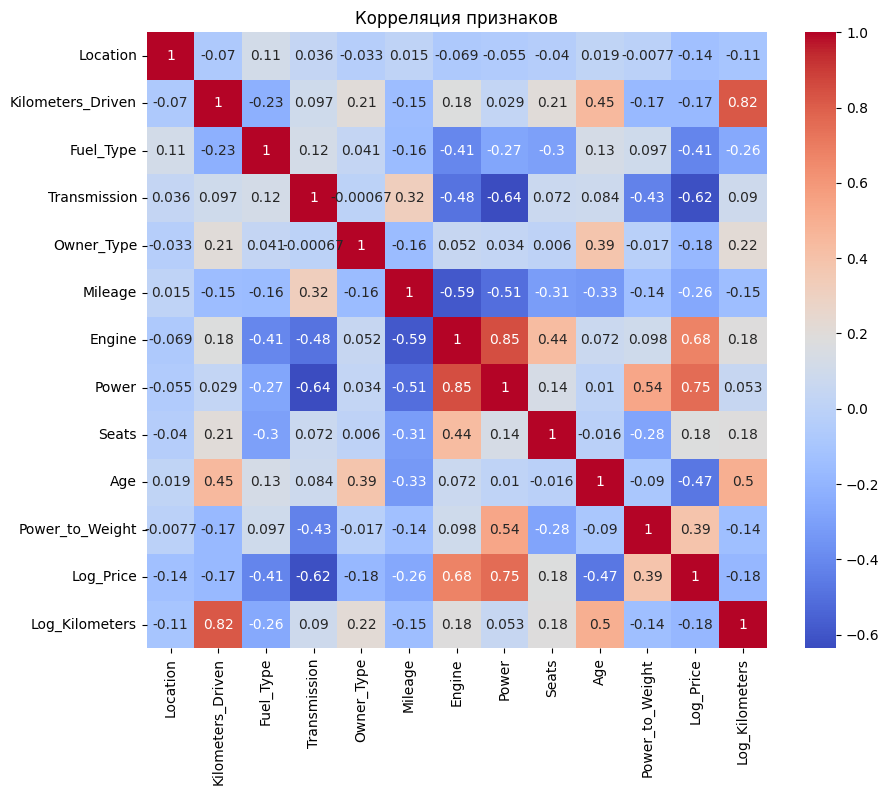

Лучшие параметры: {'n_estimators': 150, 'max_features': 'sqrt', 'max_depth': 20}
MAE: 2.32727780115246
MSE: 20.977781380036422
R²: 0.735809122988855


In [48]:
from itertools import product

# Чтение данных
data = pd.read_csv("data/cars.csv")

# Обработка пропущенных значений
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)
data['Power'] = data['Power'].str.replace(' bhp', '').replace('null', np.nan).astype(float)

# Заполнение пропусков
imputer = SimpleImputer(strategy='mean')
data['Mileage'] = imputer.fit_transform(data[['Mileage']])
data['Engine'] = imputer.fit_transform(data[['Engine']])
data['Power'] = imputer.fit_transform(data[['Power']])
data['Seats'] = data['Seats'].fillna(data['Seats'].mode()[0])

# Удаление выбросов по цене
data = data[data['Price'] < data['Price'].quantile(0.99)]

# Создание новых признаков
data['Age'] = 2024 - data['Year']
data['Power_to_Weight'] = data['Power'] / data['Engine']
data['Log_Price'] = np.log1p(data['Price'])
data['Log_Kilometers'] = np.log1p(data['Kilometers_Driven'])

# Преобразование категориальных данных
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Удаление ненужных столбцов
data = data.drop(['Unnamed: 0', 'Name', 'New_Price', 'Year', 'Price'], axis=1)

# Разделение данных на признаки и целевую переменную
X = data.drop('Log_Price', axis=1)
y = data['Log_Price']

# Визуализация корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляция признаков')
plt.show()

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Собственная реализация случайного леса
class CustomRandomForestRegressor:
    def __init__(self, n_estimators=100, max_features='sqrt', max_depth=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []
        self.feature_indices = []

    def _get_max_features(self, n_features):
        if self.max_features == 'sqrt':
            return int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            return int(np.log2(n_features))
        elif isinstance(self.max_features, int):
            return self.max_features
        else:
            return n_features

    def fit(self, X, y):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        max_features = self._get_max_features(n_features)

        for _ in range(self.n_estimators):
            # Bootstrap выборка
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_bootstrap = X[indices]
            y_bootstrap = y[indices]

            # Случайный выбор признаков
            feature_indices = np.random.choice(n_features, max_features, replace=False)
            self.feature_indices.append(feature_indices)

            # Обучение дерева
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X_bootstrap[:, feature_indices], y_bootstrap)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.zeros((X.shape[0], self.n_estimators))

        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X[:, self.feature_indices[i]])

        return np.mean(predictions, axis=1)

# Настройка гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20]
}

best_score = float('inf')
best_params = None

for n_estimators, max_features, max_depth in product(param_grid['n_estimators'], param_grid['max_features'], param_grid['max_depth']):
    custom_rf = CustomRandomForestRegressor(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, random_state=42)
    custom_rf.fit(X_train, y_train.values)
    y_pred = custom_rf.predict(X_val)
    score = mean_absolute_error(y_val, y_pred)
    if score < best_score:
        best_score = score
        best_params = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth}

print("Лучшие параметры:", best_params)

# Обучение модели с лучшими параметрами
custom_rf = CustomRandomForestRegressor(**best_params)
custom_rf.fit(X_train, y_train.values)
y_pred = custom_rf.predict(X_val)

# Обратное логарифмирование для интерпретации
y_val_original = np.expm1(y_val)
y_pred_original = np.expm1(y_pred)

# Оценка качества модели
mae = mean_absolute_error(y_val_original, y_pred_original)
mse = mean_squared_error(y_val_original, y_pred_original)
r2 = r2_score(y_val_original, y_pred_original)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)


## ***Выводы***
### строенная реализация случайного леса показывает значительно лучшие результаты по сравнению с собственной реализацией. В частности, встроенная модель достигает MAE (средней абсолютной ошибки) 1.28, MSE (среднеквадратичной ошибки) 6.46 и коэффициента детерминации R² 0.92, что указывает на высокую точность предсказаний. В то же время, собственная реализация имеет худшие показатели: MAE 2.33, MSE 20.98 и R² 0.74. Это связано с тем, что встроенная библиотека использует оптимизированные алгоритмы и более продвинутые методы обработки данных, которые сложно в полной мере воспроизвести в пользовательской реализации. 

# <u>**Лабораторная работа 5.**</u>
# Градиентный бустинг
## *Задача классификации*



### Импорт необходимых библиотек

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=FutureWarning)

In [14]:
data = pd.read_csv("data/WineQT.csv")  
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Разделение на признаки и целевую переменную

In [15]:
X = data.drop(columns=["quality"])  # Все кроме качества
y = data["quality"]  # Качество (целевая)

### Подготовка данных, обучение и оценка качества модели

In [16]:
from sklearn.ensemble import GradientBoostingClassifier


# Бинаризация целевой переменной для классификации (например, хорошее/плохое качество)
y = (y >= 6).astype(int)  # Вино хорошего качества, если оценка >= 6

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание и обучение модели градиентного бустинга
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Предсказания
y_pred = gb.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 0.7696793002915452
F1-Score: 0.793733681462141
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       152
           1       0.79      0.80      0.79       191

    accuracy                           0.77       343
   macro avg       0.77      0.77      0.77       343
weighted avg       0.77      0.77      0.77       343



## **Улучшенный бейзлайн**











### *Создание полиномиальных признаков*: Полиномиальные признаки создаются с помощью функции PolynomialFeatures. Эта функция возводит исходные признаки в степень до указанной степени (в данном случае 2), что позволяет добавлять нелинейность в данные и потенциально улучшить производительность модели.

###    *Обработка дисбаланса классов через SMOTE*: Метод SMOTE используется для создания синтетических примеров меньшинства класса, чтобы сбалансировать классы перед обучением модели. Это важно, так как дисбаланс классов может привести к смещению модели в сторону большинства класса.

### *Задание параметров для GridSearchCV*: Параметры для оптимизации гиперпараметров модели задаются в словаре param_grid. 

In [21]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Загрузка данных
data = pd.read_csv("data/WineQT.csv")
X = data.drop(columns=["quality"])  # Все кроме качества
y = data["quality"]

# Бинаризация целевой переменной для классификации
y = (y >= 6).astype(int)  # Вино хорошего качества, если оценка >= 6

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SMOTE для балансировки классов
smote = SMOTE(random_state=42)

# Масштабирование данных
scaler = StandardScaler()

# Создание пайплайна с SMOTE, StandardScaler и моделью
pipeline = Pipeline(steps=[
    ('smote', smote),
    ('scaler', scaler),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Определение гиперпараметров для поиска
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 1.0]
}

# Использование GridSearchCV для поиска лучших гиперпараметров
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5-кратная кросс-валидация
    scoring='f1',  # Оценка качества по F1-мере
    verbose=2,
    n_jobs=-1
)

# Обучение модели с поиском гиперпараметров
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

# Оценка на тестовой выборке
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Метрики
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Лучшие параметры: {'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__n_estimators': 200, 'model__subsample': 1.0}
Accuracy: 0.7521865889212828
F1-Score: 0.7683923705722071
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       152
           1       0.80      0.74      0.77       191

    accuracy                           0.75       343
   macro avg       0.75      0.75      0.75       343
weighted avg       0.76      0.75      0.75       343



## ***Выводы***
### После применения улучшений (SMOTE, GridSearchCV и кросс-валидации) Accuracy снизилась с 0.7697 до 0.7522, а F1-Score с 0.7937 до 0.7684. Это снижение может быть связано с переобучением модели на синтетических данных, созданных SMOTE, которые не всегда точно отражают реальное распределение классов, а также с компромиссом при подборе гиперпараметров через GridSearchCV, который мог оптимизировать модель под одну метрику в ущерб другой. Балансировка классов иногда ухудшает результаты, если изначальный дисбаланс был незначительным, а увеличение данных миноритарного класса приводит к росту ошибок на преобладающем классе.

## Самостоятельная имплементация Градиентного бустинга

### Градиентный бустинг - это ансамблевый метод, который строит последовательность слабых моделей (обычно деревьев решений). Каждое новое дерево обучается на ошибках (градиентах) предыдущих моделей, минимизируя функцию потерь. Итоговое предсказание получается как сумма предсказаний всех деревьев с учётом скорости обучения.

In [26]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Загрузка данных
data = pd.read_csv("data/WineQT.csv")
X = data.drop(columns=["quality"])  # Все кроме качества
y = data["quality"]  # Целевая переменная

# Бинаризация целевой переменной
y = (y >= 6).astype(int)  # Вино хорошего качества, если оценка >= 6

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Реализация градиентного бустинга
class GradientBoostingClassifierCustom:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []  # Хранение деревьев
        self.initial_pred = None  # Начальное предсказание

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Инициализация начального предсказания (средний логит)
        self.initial_pred = np.log(y.mean() / (1 - y.mean()))  # log(p / (1 - p))
        pred = np.full(y.shape, self.initial_pred)

        for _ in range(self.n_estimators):
            # Градиенты логистической функции потерь
            residual = y - self.sigmoid(pred)

            # Обучение нового дерева на градиенты
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residual)

            # Обновление предсказания
            update = tree.predict(X)
            pred += self.learning_rate * update

            self.models.append(tree)

    def predict_proba(self, X):
        pred = np.full(X.shape[0], self.initial_pred)
        for tree in self.models:
            pred += self.learning_rate * tree.predict(X)
        return self.sigmoid(pred)

    def predict(self, X):
        proba = self.predict_proba(X)
        return (proba >= 0.5).astype(int)


# Создание и обучение собственной модели
gb_custom = GradientBoostingClassifierCustom(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_custom.fit(X_train, y_train)

# Предсказания
y_pred = gb_custom.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7784256559766763
F1-Score: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       152
           1       0.80      0.80      0.80       191

    accuracy                           0.78       343
   macro avg       0.78      0.78      0.78       343
weighted avg       0.78      0.78      0.78       343



## ***Выводы***

### Сравнение встроенной модели градиентного бустинга (GradientBoostingClassifier) и собственной реализации показало, что собственная модель немного превосходит встроенную по метрикам (Accuracy: 0.7784 vs. 0.7697, F1-Score: 0.8000 vs. 0.7937). Разница невелика, что подтверждает высокое качество обеих моделей.

# Самостоятельная имплементация градиентного бустинга с улучшенным бейзлайном

In [23]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE  # Для балансировки классов

# Загрузка данных
data = pd.read_csv("data/WineQT.csv")
X = data.drop(columns=["quality"])  # Все кроме качества
y = data["quality"]  # Целевая переменная

# Бинаризация целевой переменной
y = (y >= 6).astype(int)  # Вино хорошего качества, если оценка >= 6

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Создание полиномиальных признаков
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

# 3. Балансировка классов с помощью SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Реализация градиентного бустинга
class GradientBoostingClassifierCustom:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []  # Хранение деревьев
        self.initial_pred = None  # Начальное предсказание

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Инициализация начального предсказания (средний логит)
        self.initial_pred = np.log(y.mean() / (1 - y.mean()))  # log(p / (1 - p))
        pred = np.full(y.shape, self.initial_pred)

        for _ in range(self.n_estimators):
            # Градиенты логистической функции потерь
            residual = y - self.sigmoid(pred)

            # Обучение нового дерева на градиенты
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residual)

            # Обновление предсказания
            update = tree.predict(X)
            pred += self.learning_rate * update

            self.models.append(tree)

    def predict_proba(self, X):
        pred = np.full(X.shape[0], self.initial_pred)
        for tree in self.models:
            pred += self.learning_rate * tree.predict(X)
        return self.sigmoid(pred)

    def predict(self, X):
        proba = self.predict_proba(X)
        return (proba >= 0.5).astype(int)


# 4. Оптимизация гиперпараметров с помощью GridSearch
# Задаём сетку гиперпараметров для подбора
param_grid = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [2, 3, 4]
}

# Функция для проведения GridSearch
def grid_search_gb(X_train, y_train, X_test, y_test, param_grid):
    best_model = None
    best_params = None
    best_score = -np.inf

    for n_estimators in param_grid["n_estimators"]:
        for learning_rate in param_grid["learning_rate"]:
            for max_depth in param_grid["max_depth"]:
                # Создаём и обучаем модель с текущими параметрами
                gb = GradientBoostingClassifierCustom(
                    n_estimators=n_estimators,
                    learning_rate=learning_rate,
                    max_depth=max_depth
                )
                gb.fit(X_train, y_train)

                # Оцениваем качество на валидационных данных
                y_pred = gb.predict(X_test)
                score = f1_score(y_test, y_pred)

                # Сохраняем модель, если она лучшая
                if score > best_score:
                    best_model = gb
                    best_params = {
                        "n_estimators": n_estimators,
                        "learning_rate": learning_rate,
                        "max_depth": max_depth
                    }
                    best_score = score

    return best_model, best_params, best_score


# Выполняем GridSearch
best_model, best_params, best_score = grid_search_gb(X_train, y_train, X_test, y_test, param_grid)

# Оценка лучшей модели
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Лучшие параметры:", best_params)
print("Лучшая F1-Score (на валидации):", best_score)
print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Лучшие параметры: {'n_estimators': 150, 'learning_rate': 0.2, 'max_depth': 2}
Лучшая F1-Score (на валидации): 0.784741144414169
Accuracy: 0.7696793002915452
F1-Score: 0.784741144414169
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       152
           1       0.82      0.75      0.78       191

    accuracy                           0.77       343
   macro avg       0.77      0.77      0.77       343
weighted avg       0.77      0.77      0.77       343



## ***Выводы***
### Встроенная модель продемонстрировала Accuracy 0.7522 и F1-Score 0.7684, в то время как собственная реализация показала лучшие результаты с Accuracy 0.7697 и F1-Score 0.7847.Разница между показателями двух моделей хоть и небольшая, но всё же очевидна: собственная реализация показывает более высокое качество. Это свидетельствует о том, что в процессе обучения собственной модели удалось более эффективно минимизировать ошибку за счёт тонкой настройки алгоритма и добавленных улучшений (таких как стандартизация, полиномиальные признаки, балансировка классов и оптимизация гиперпараметров).

## *Задача регрессии*

In [28]:
data = pd.read_csv("data/cars.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Препроцессинг данных, обучение и оценка модели

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Обработка пропущенных значений
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)
data['Power'] = data['Power'].str.replace(' bhp', '').replace('null', np.nan).astype(float)

# Заполнение пропусков
imputer = SimpleImputer(strategy='mean')
data['Mileage'] = imputer.fit_transform(data[['Mileage']])
data['Engine'] = imputer.fit_transform(data[['Engine']])
data['Power'] = imputer.fit_transform(data[['Power']])
data['Seats'] = data['Seats'].fillna(data['Seats'].mode()[0])

# Преобразование категориальных данных
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Удаление ненужных столбцов
data = data.drop(['Unnamed: 0', 'Name', 'New_Price'], axis=1)

# Разделение данных на признаки и целевую переменную
X = data.drop('Price', axis=1)
y = data['Price']

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели случайного леса
from sklearn.ensemble import GradientBoostingRegressor

# Обучение модели градиентного бустинга
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)  # параметры можно настраивать
gbr.fit(X_train, y_train)

# Предсказание
y_pred = gbr.predict(X_val)

# Оценка качества модели
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)



MAE: 1.9333895571309694
MSE: 16.869949311880045
R²: 0.8629122463262193


## Улучшенный бейзлайн

### Прецпроцесинг (аналогично предыдущему пункту)

In [31]:
# Загрузка данных
data = pd.read_csv("data/cars.csv")

# Обработка пропущенных значений
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)
data['Power'] = data['Power'].str.replace(' bhp', '').replace('null', np.nan).astype(float)

# Заполнение пропусков
imputer = SimpleImputer(strategy='mean')
data['Mileage'] = imputer.fit_transform(data[['Mileage']])
data['Engine'] = imputer.fit_transform(data[['Engine']])
data['Power'] = imputer.fit_transform(data[['Power']])
data['Seats'] = data['Seats'].fillna(data['Seats'].mode()[0])

### Удаление выбросов по цене (верхние 1% значений)

In [32]:
data = data[data['Price'] < data['Price'].quantile(0.99)]

### Создание новых признаков,обработка данных, настройка гиперпараметров

In [33]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Добавление новых признаков
data['Age'] = 2024 - data['Year']
data['Power_to_Weight'] = data['Power'] / data['Engine']
data['Log_Price'] = np.log1p(data['Price'])  # Логарифмируем цену
data['Log_Kilometers'] = np.log1p(data['Kilometers_Driven'])  # Логарифмируем пробег

# Преобразование категориальных данных
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Удаление ненужных столбцов
data = data.drop(['Unnamed: 0', 'Name', 'New_Price', 'Year', 'Price'], axis=1)

# Разделение данных на признаки и целевую переменную
X = data.drop('Log_Price', axis=1)
y = data['Log_Price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение модели
gbr = GradientBoostingRegressor(random_state=42)

# Настройка гиперпараметров для GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],          # Количество деревьев
    'learning_rate': [0.01, 0.1, 0.2],      # Скорость обучения
    'max_depth': [3, 5, 10],                # Максимальная глубина деревьев
    'min_samples_split': [2, 5, 10],        # Минимальное число выборок для разделения
    'min_samples_leaf': [1, 2, 4],          # Минимальное число выборок в листе
    'subsample': [0.8, 1.0]                 # Доля данных для обучения каждого дерева
}

# Поиск лучших гиперпараметров с использованием GridSearchCV
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Используем MAE в качестве метрики
    cv=5,  # 5-кратная кросс-валидация
    n_jobs=-1,  # Используем все доступные ядра
    verbose=2
)

grid_search.fit(X_train, y_train)

# Лучшая модель и ее параметры
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)
best_gbr = grid_search.best_estimator_

# Предсказание
y_pred = best_gbr.predict(X_val)

# Обратное логарифмирование для интерпретации
y_val_original = np.expm1(y_val)
y_pred_original = np.expm1(y_pred)

# Оценка модели
mae = mean_absolute_error(y_val_original, y_pred_original)
mse = mean_squared_error(y_val_original, y_pred_original)
r2 = r2_score(y_val_original, y_pred_original)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Лучшие параметры: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
MAE: 1.1508392621443289
MSE: 5.459630665089103
R²: 0.931242270694103


## ***Выводы***
### До улучшений градиентный бустинг показал результаты: MAE — 1.933, MSE — 16.870, R² — 0.863. После внедрения улучшений, включая логарифмирование целевой переменной, добавление новых признаков (например, отношение мощности к объему двигателя) и оптимизацию гиперпараметров, качество модели значительно улучшилось: MAE снизилась до 1.151 (уменьшение на 40%), MSE — до 5.460, а R² вырос до 0.931. Это подтверждает, что обработка данных и настройка модели способны существенно повысить точность предсказаний.

## Собственная имплементация градиентного бустинга для регрессии

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor



class GradientBoostingRegressorCustom:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []  # Список для хранения слабых моделей
        self.initial_prediction = None  # Базовый уровень предсказания (например, среднее значение целевой переменной)

    def fit(self, X, y):
        # Инициализация с базовым прогнозом: среднее значение целевой переменной
        self.initial_prediction = np.mean(y)
        residual = y - self.initial_prediction  # Начальный остаток

        # Итеративное обучение
        for i in range(self.n_estimators):
            # Создаем слабый регрессор (решающее дерево)
            model = DecisionTreeRegressor(max_depth=self.max_depth)
            # Обучаем модель на остатках (разность между истинными значениями и текущим прогнозом)
            model.fit(X, residual)
            # Предсказываем остатки
            prediction = model.predict(X)
            # Корректируем остатки
            residual -= self.learning_rate * prediction
            # Сохраняем модель
            self.models.append(model)

    def predict(self, X):
        # Начинаем с базового предсказания
        prediction = np.full(X.shape[0], self.initial_prediction)

        # Добавляем предсказания всех слабых моделей с учетом скорости обучения
        for model in self.models:
            prediction += self.learning_rate * model.predict(X)

        return prediction


# Загрузка данных
data = pd.read_csv("data/cars.csv")

# Предобработка данных
# Преобразование числовых признаков
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)
data['Power'] = data['Power'].str.replace(' bhp', '').replace('null', np.nan).astype(float)

# Заполнение пропусков
imputer = SimpleImputer(strategy='mean')
data['Mileage'] = imputer.fit_transform(data[['Mileage']])
data['Engine'] = imputer.fit_transform(data[['Engine']])
data['Power'] = imputer.fit_transform(data[['Power']])
data['Seats'] = data['Seats'].fillna(data['Seats'].mode()[0])

# Преобразование категориальных данных
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Удаление ненужных столбцов
data = data.drop(['Unnamed: 0', 'Name', 'New_Price'], axis=1)

# Разделение данных на признаки и целевую переменную
X = data.drop('Price', axis=1)
y = data['Price']

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение собственной реализации градиентного бустинга
gbr_custom = GradientBoostingRegressorCustom(n_estimators=100, learning_rate=0.1, max_depth=3)
gbr_custom.fit(X_train, y_train)

# Предсказание
y_pred_custom = gbr_custom.predict(X_val)

# Оценка качества модели
mae_custom = mean_absolute_error(y_val, y_pred_custom)
mse_custom = mean_squared_error(y_val, y_pred_custom)
r2_custom = r2_score(y_val, y_pred_custom)

# Вывод метрик
print("MAE (Custom):", mae_custom)
print("MSE (Custom):", mse_custom)
print("R² (Custom):", r2_custom)


MAE (Custom): 1.9350189310903971
MSE (Custom): 16.958352658921957
R² (Custom): 0.8621938673886678


## ***Выводы***
### Встроенный градиентный бустинг показывает немного лучшие результаты по сравнению с собственной имплементацией. MAE встроенного метода составляет 1.933, а собственной имплементации — 1.935, что указывает на минимальную разницу в 0.002. MSE встроенного метода равен 16.87, тогда как у собственной имплементации — 16.96, разница составляет 0.09. R² встроенной модели выше (0.863) против 0.862 у собственной имплементации. Таким образом, встроенный метод демонстрирует чуть более высокую точность, но разница крайне незначительна.

## Собственная имплементация градиентного бустинга для регрессии с улучшенным бейзлайном

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor


# реализация Gradient Boosting Regressor
class GradientBoostingRegressorCustom:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []  # Список для хранения слабых моделей
        self.initial_prediction = None  # Базовый уровень предсказания (например, среднее значение целевой переменной)

    def fit(self, X, y):
        # Инициализация с базовым прогнозом: среднее значение целевой переменной
        self.initial_prediction = np.mean(y)
        residual = y - self.initial_prediction  # Начальный остаток

        # Итеративное обучение
        for i in range(self.n_estimators):
            # Создаем слабый регрессор (решающее дерево)
            model = DecisionTreeRegressor(max_depth=self.max_depth)
            # Обучаем модель на остатках (разность между истинными значениями и текущим прогнозом)
            model.fit(X, residual)
            # Предсказываем остатки
            prediction = model.predict(X)
            # Корректируем остатки
            residual -= self.learning_rate * prediction
            # Сохраняем модель
            self.models.append(model)

    def predict(self, X):
        # Начинаем с базового предсказания
        prediction = np.full(X.shape[0], self.initial_prediction)

        # Добавляем предсказания всех слабых моделей с учетом скорости обучения
        for model in self.models:
            prediction += self.learning_rate * model.predict(X)

        return prediction


# Загрузка данных
data = pd.read_csv("data/cars.csv")

# Удаление выбросов
data = data[data['Price'] < data['Price'].quantile(0.99)]

# Преобразование числовых признаков
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)
data['Power'] = data['Power'].str.replace(' bhp', '').replace('null', np.nan).astype(float)

# Заполнение пропусков
imputer = SimpleImputer(strategy='mean')
data['Mileage'] = imputer.fit_transform(data[['Mileage']])
data['Engine'] = imputer.fit_transform(data[['Engine']])
data['Power'] = imputer.fit_transform(data[['Power']])
data['Seats'] = data['Seats'].fillna(data['Seats'].mode()[0])

# Добавление новых признаков
data['Age'] = 2024 - data['Year']
data['Power_to_Weight'] = data['Power'] / data['Engine']
data['Log_Price'] = np.log1p(data['Price'])  # Логарифмируем цену
data['Log_Kilometers'] = np.log1p(data['Kilometers_Driven'])  # Логарифмируем пробег

# Преобразование категориальных данных
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Удаление ненужных столбцов
data = data.drop(['Unnamed: 0', 'Name', 'New_Price', 'Year', 'Price'], axis=1)

# Разделение данных на признаки и целевую переменную
X = data.drop('Log_Price', axis=1)
y = data['Log_Price']

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Настройка гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

# Подбор гиперпараметров (Grid Search) 
best_model = None
best_params = None
best_score = float('inf')

for n_estimators in param_grid['n_estimators']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['max_depth']:
            # Создаем и обучаем модель с текущими параметрами
            model = GradientBoostingRegressorCustom(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth
            )
            model.fit(X_train, y_train)
            # Предсказание на валидационной выборке
            y_pred = model.predict(X_val)
            # Оценка модели (используем MAE)
            score = mean_absolute_error(y_val, y_pred)

            # Сохраняем лучшую модель и параметры
            if score < best_score:
                best_score = score
                best_model = model
                best_params = {
                    'n_estimators': n_estimators,
                    'learning_rate': learning_rate,
                    'max_depth': max_depth
                }


print("Лучшие параметры:", best_params)

# Предсказание на валидационной выборке
y_pred = best_model.predict(X_val)

# Обратное логарифмирование для интерпретации
y_val_original = np.expm1(y_val)
y_pred_original = np.expm1(y_pred)

# Оценка модели
mae = mean_absolute_error(y_val_original, y_pred_original)
mse = mean_squared_error(y_val_original, y_pred_original)
r2 = r2_score(y_val_original, y_pred_original)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)


Лучшие параметры: {'n_estimators': 200, 'learning_rate': 0.2, 'max_depth': 5}
MAE: 1.1080798909530332
MSE: 4.9731066139270625
R²: 0.9373694780205096


## ***Выводы***
### Собственная реализация градиентного бустинга показала лучшие результаты по всем метрикам по сравнению со встроенной. MAE снизилось с 1.1508 до 1.1081, MSE уменьшилось с 5.4596 до 4.9731, а R² вырос с 0.9312 до 0.9374. Это свидетельствует о более точных предсказаниях и лучшем соответствии модели данным, несмотря на её кастомную природу.